# Logit Model

## 1. Set Up 

**Note**: Vaux-sur-Morges stands out as an outlier because of its extraordinary circumstances. Its average income is skewed by the billionaire owner of Roche, leading to a figure of 591.1k, while the rest of its 169 inhabitants are mostly middle-class farmers. Due to its unique nature and the inability of the municipality's average income to represent its inhabitants, Vaux-sur-Morges is excluded prior to any further analysis.This step is taken before removing other outliers to ensure a fair comparison between the Logit and Random Forest baseline models (the random forest models need all variables not included in the analysis to be removed early in the set up process for indexing purposes).

In [85]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statsmodels for statistical modeling
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import MLEInfluence

# Scikit-learn for data preprocessing, model training, and evaluation
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn.metrics import roc_curve, auc, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Configure pandas and matplotlib
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline 
# The above enables the inline display of matplotlib plots directly within the notebook interface





# Load data
Data_clean = pd.read_csv("ML_final_data_clean.csv")



# Find Vaux-sur-Morges, the municipality with the highest average income in the country
highest_income = Data_clean[Data_clean['Average_income'] == Data_clean['Average_income'].max()]
print(highest_income[['Municipality_name', 'Average_income']])

# Find the index of Vaux-sur-Morges
vaux_index = Data_clean[Data_clean['Average_income'] == Data_clean['Average_income'].max()].index[0]

# Remove the observation from the dataset
Data_clean = Data_clean.drop(index=vaux_index)

# Find the next municipality with the highest average income in the country
highest_income = Data_clean[Data_clean['Average_income'] == Data_clean['Average_income'].max()]
print(highest_income[['Municipality_name', 'Average_income']])
# Colony is the fanciest neighbourhood in Geneva, known to be home to many billionnaires and families of generational wealth. 
# The average income of this municipality is more representative of its residents.


# Define X and y columns
X_columns = ['Average_income', 'Tax_burden_80k', 'Tax_burden_150k', 
          'Percent_age_65_and_over', 'Percent_age_20_39','Total_pop_2022',
          'SP_percent_19', 'SPD_percent_19', 'Liberal_percent_19',
          'PDC_percent_19', 'French_Region', 'Italian_Region', 'Romansh_Region',
             'Urban_Municipality', 'Rural_Municipality']
y_column = ['Referendum_pass']

X = Data_clean[X_columns]
y = Data_clean[y_column]

Data_clean # View the data frame

     Municipality_name  Average_income
1724   Vaux-sur-Morges           591.1
     Municipality_name  Average_income
2046           Cologny          402.12


bfs_nr_new           Municipality_name  Referendum_pass  \
0              1             Aeugst am Albis                0   
1              2          Affoltern am Albis                1   
2              3                  Bonstetten                0   
3              4             Hausen am Albis                0   
4              5                    Hedingen                1   
5              6             Kappel am Albis                0   
6              7                      Knonau                1   
7              8                 Maschwanden                0   
8              9              Mettmenstetten                0   
9             10                    Obfelden                1   
10            11                   Ottenbach                1   
11            12                  Rifferswil                1   
12            13                   Stallikon                0   
13            14           Wettswil am Albis                0   
14            22                 Benken (ZH)                0   
15            23              Berg am Irchel                0   
16            24              Buch am Irchel                0   
17            25                     Dachsen                1   
18            26                        Dorf                0   
19            27                 Feuerthalen                1   
20            28                      Flaach                0   
21            29                  Flurlingen                0   
22            31                    Henggart                0   
23            33            Kleinandelfingen                0   
24            34             Laufen-Uhwiesen                0   
25            35                   Marthalen                0   
26            37                    Ossingen                0   
27            38                     Rheinau                1   
28            39        Thalheim an der Thur                1   
29            40                   Trüllikon                0   
30            41                   Truttikon                1   
31            43                      Volken                0   
32            51                Bachenbülach                1   
33            52                 Bassersdorf                1   
34            53                      Bülach                1   
35            54                   Dietlikon                1   
36            55                     Eglisau                1   
37            56                     Embrach                1   
38            57          Freienstein-Teufen                1   
39            58                 Glattfelden                1   
40            59                  Hochfelden                1   
41            60                        Höri                1   
42            61                  Hüntwangen                1   
43            62                      Kloten                1   
44            63                    Lufingen                0   
45            64                  Nürensdorf                0   
46            65                 Oberembrach                0   
47            66                     Opfikon                1   
48            67                        Rafz                1   
49            68                      Rorbas                1   
50            69                 Wallisellen                0   
51            70                Wasterkingen                1   
52            71                    Wil (ZH)                0   
53            72                      Winkel                0   
54            81                       Bachs                0   
55            82                   Boppelsen                0   
56            83                  Buchs (ZH)                1   
57            84                    Dällikon                1   
58            85                     Dänikon                1   
59            86                   Dielsdorf                1   
60            87                    Hütti

## 2. Descriptive and Summary Statistics

This section remains relatively light as the data cleaning and wrangling has already been completed in R.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124 entries, 0 to 2123
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bfs_nr_new               2124 non-null   int64  
 1   Municipality_name        2124 non-null   object 
 2   Referendum_pass          2124 non-null   int64  
 3   Liberal_percent_19       2124 non-null   float64
 4   PDC_percent_19           2124 non-null   float64
 5   SP_percent_19            2124 non-null   float64
 6   SPD_percent_19           2124 non-null   float64
 7   Average_income           2124 non-null   float64
 8   Total_pop_2022           2124 non-null   int64  
 9   Percent_age_65_and_over  2124 non-null   float64
 10  Percent_age_20_39        2124 non-null   float64
 11  Tax_burden_80k           2124 non-null   float64
 12  Tax_burden_150k          2124 non-null   float64
 13  French_Region            2124 non-null   int64  
 14  German_Region           

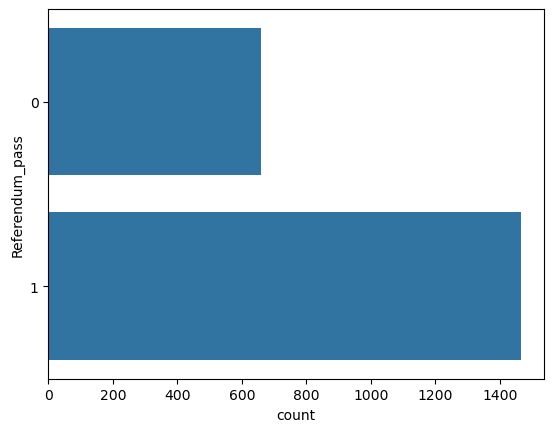

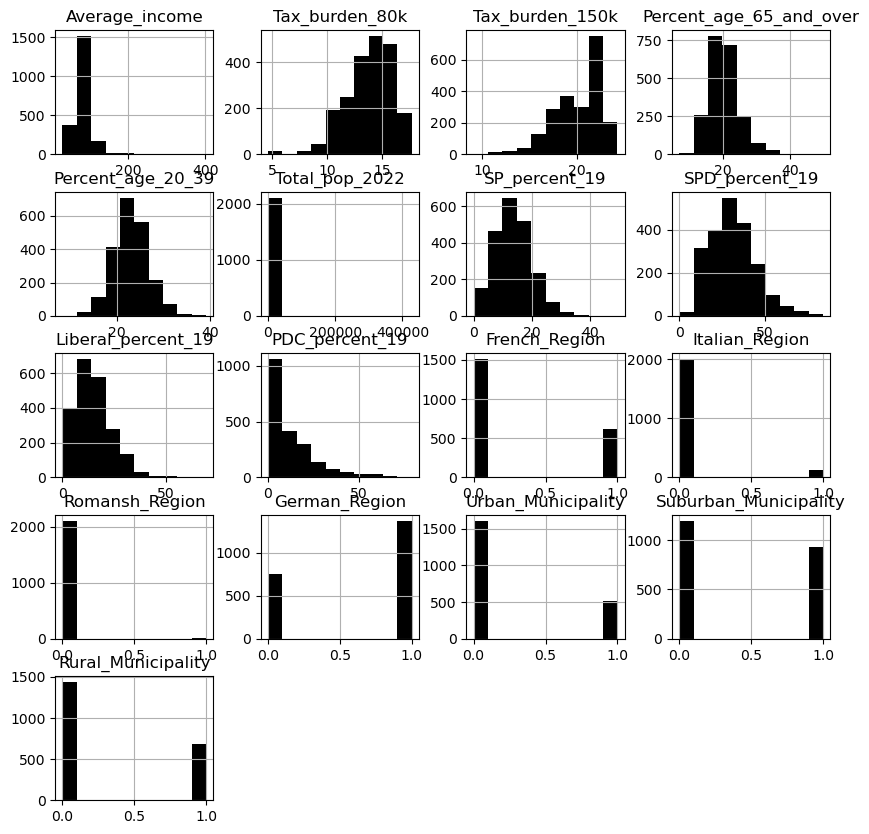

In [253]:
# Inspect the data
Data_clean.info() # Variable types and count

# As the referendum was supported by 58.25% of voters, the target variables is expected to be unbalanced.
sns.countplot(y='Referendum_pass',data=Data_clean) # Plot the target variable class balance  

n1 = sum(Data_clean['Referendum_pass'] == 1)  # Majority class
n0 = sum(Data_clean['Referendum_pass'] == 0)  # Minority class
print("Majority class (Referendum_pass = 1):", n1) # Number of instances in the majority class: 1464
print("Minority class (Referendum_pass = 0):", n0) # Number of instances in the minority class:660



# Illustrate the distribution of predictor variables
X.hist(color='black',figsize=(10,10))
plt.show()


In [315]:
Data_clean.describe() # Descriptive statistics

bfs_nr_new  Referendum_pass  Liberal_percent_19  PDC_percent_19  \
count  2125.000000      2125.000000         2125.000000     2125.000000   
mean   3298.524235         0.689412           14.949511       12.663944   
std    2130.131230         0.462843            9.151272       13.920590   
min       1.000000         0.000000            0.000000        0.000000   
25%    1084.000000         0.000000            8.730159        2.272727   
50%    3298.000000         1.000000           13.857678        7.971014   
75%    5413.000000         1.000000           20.000000       18.398268   
max    6812.000000         1.000000           69.719350       79.357798   

       SP_percent_19  SPD_percent_19  Average_income  Total_pop_2022  \
count    2125.000000     2125.000000     2125.000000     2125.000000   
mean       13.665086       31.295619       83.096689     4147.787765   
std         6.361808       13.383053       27.127292    13190.502594   
min         0.000000        0.000000       30.130000       29.000000   
25%         9.223647       21.483942       69.890000      772.000000   
50%        13.315927       30.370370       77.540000     1674.000000   
75%        17.662849       39.541547       88.020000     4085.000000   
max        49.404762       83.962264      591.100000   427721.000000   

       Percent_age_65_and_over  Percent_age_20_39  Tax_burden_80k  \
count              2125.000000        2125.000000     2125.000000   
mean                 20.282467          22.976154       13.764800   
std                   4.546094           3.691214        2.117723   
min                   6.769231           8.333333        4.600000   
25%                  17.252396          20.520231       12.500000   
50%                  19.804287          22.850679       14.200000   
75%                  22.613883          25.330813       15.300000   
max                  50.000000          39.130435       17.700000   

       Tax_burden_150k  French_Region  German_Region  Italian_Region  \
count      2125.000000    2125.000000    2125.000000     2125.000000   
mean         20.072847       0.289412       0.646588        0.056941   
std           2.538788       0.453596       0.478142        0.231785   
min           9.100000       0.000000       0.000000        0.000000   
25%          18.400000       0.000000       0.000000        0.000000   
50%          20.900000       0.000000       1.000000        0.000000   
75%          22.000000       1.000000       1.000000        0.000000   
max          24.300000       1.000000       1.000000        1.000000   

       Romansh_Region  Urban_Municipality  Suburban_Municipality  \
count     2125.000000         2125.000000            2125.000000   
mean         0.007059            0.240471               0.436235   
std          0.083739            0.427470               0.496034   
min          0.000000            0.000000               0.000000   
25%          0.000000            0.000000               0.000000   
50%          0.000000            0.000000               0.000000   
75%          0.000000            0.000000               1.000000   
max          1.000000            1.000000               1.000000   

       Rural_Municipality  
count         2125.000000  
mean             0.323294  
std              0.467844  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              1.000000  
max              1.000000

## 3. Default and Baseline Logit Models

#### 3.1 Fitting a Default Model on the Entire Data and Summary Report

**Note**: This model is solely fitted for the purpose of getting preliminary insights into the relationship of features and the target. It will *not* be referred to or used at any point later in the analysis.

The model standardises the numeric variables for accurate comparison of feature importance. All variables are included without further modification.

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Standardize the numeric variables for comparativeness
numeric_features = ['Average_income', 'Tax_burden_80k', 'Tax_burden_150k', 'Percent_age_65_and_over', 
                    'Percent_age_20_39', 'Total_pop_2022', 'SP_percent_19', 'SPD_percent_19', 
                    'Liberal_percent_19', 'PDC_percent_19']
scaler = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'  # Leave dummy variables unchanged
)

X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame 
X_scaled_df = pd.DataFrame(X_scaled, columns=scaler.get_feature_names_out(), index=X.index)

# Add a constant to the predictors
X_scaled_with_const = sm.add_constant(X_scaled_df)

# Define and fit the baseline logit model
logit_default_model = sm.Logit(y, X_scaled_with_const)
logit_default_result = logit_default_model.fit()

# Print the results
print(logit_default_result.summary())



Optimization terminated successfully.
         Current function value: 0.332966
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:        Referendum_pass   No. Observations:                 2124
Model:                          Logit   Df Residuals:                     2108
Method:                           MLE   Df Model:                           15
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.4627
Time:                        17:09:52   Log-Likelihood:                -707.22
converged:                       True   LL-Null:                       -1316.2
Covariance Type:            nonrobust   LLR p-value:                2.234e-250
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.8221      0.118      6.944      0

Quick analysis of the results:

1. **Model Fit**: The model has converged successfully, suggesting the MLE process found a stable solution.

2. **Pseudo R-squared**: The value of 0.4624 indicates that the model has a decent level of explanatory power.

3. **Coefficients**:
   - The `const` coefficient is positive, suggesting that the baseline log-odds of the referendum passing (when all numeric predictors are at their mean values due to scaling) is positive, indicating a general tendency towards the referendum passing.
   - `Average_income` has a negative coefficient, indicating that higher-income areas might be less likely to be in favour of the referendum.
   - `Tax_burden_80k` is also negative: higher tax burdens are associated with decreased likelihood of the referendum being accepted.
   - Conversely, `Tax_burden_150k` is positive: higher tax burdens are associated with increasing log-odds of the referendum being accepted, reflective of different socioeconomic impacts.
   - `Percent_age_65_and_over` has a positive coefficient: municipalities with larger populations of elderly tend to have higher referendum support.
   - `Percent_age_20_39`is positive: municipalities with larger populations of younger adults tend to have higher support for the referendum.
   - `Total_pop_2022` is negative, suggesting that in larger populations, the referendum is less likely to pass. This must be put in consideration of the size of the coefficient.
   - `Political party variables`: Except for the PDC, all political party variables show a positive relationship, indicating that higher party support correlates with more support for the referendum.
   - `Regional Variables`: The French and Italian regions are more likely to vote in favour of the referendum compared to the German region, while the Romansh region is less likely to do so.
   - `Municipality type variables`: Urban areas are more likely to support the referendum than suburban areas, while rural areas tend to support it less than suburban areas.

4. **Standard Errors**:
   - The standard errors for the regional variables are high (e.g., `French_Region`, `Italian_Region`, `Romansh_Region`), indicating potential issues with the model, such as multicollinearity, issues with the scale of variables, or a very small number of cases (likely for Romansh Region as there are only 7 such municipalities).

5. **P-values (P>|z|)**:
   - `Average_income`, `Tax_burden_80k`, `Tax_burden_150k`, `SP_percent_19`, `Liberal_percent_19`, `French_Region`, `Italian_Region`, and `Rural_Municipality` have p-values less than 0.05, significant at the 5% alpha level.
   - `Percent_age_65_and_over`, `Percent_age_20_39`, `SPD_percent_19`, `PDC_percent_19`, and `Urban_Municipality` are not significant at alpha= 0.05.
   The remaining variables are not only insignificant at alpha = 0.05 but also have very high p-values (`Total_pop_2022`, `Romansh_Region`), suggesting potential problems with the data (in addition to those already mentionned possible issues, there could be perfect separation).

6. **Confidence Intervals ([0.025, 0.975])**:
   - The confidence intervals for the regional variables are particularly wide, suggesting more instability in their estimates.
  
7. **Feature Importance**: The French and Italian regions seem the primary determinants of municipal support for the referendum, followed by the tax burden variables and support for the socialist party (SP).

**Remark**: Further investigation is required to determine if the assumptions of logit models are met and validate these preliminary insights.


#### 3.2 Baseline Model Classification Report and Overfitting

**Note**: This model *is* the one which will be referred to as the *baseline logit model*. It aims to set a standard of performance when no assumptions have been verified and the model is not tuned. 

Split the data, with 80% in the training set and 20% in the test set. Stratification is employed to maintain the original class distribution in both sets and ensure consistant and reliable evaluation (this is not considered model tuning).

In [56]:
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Fitting the model on the training data.**

*NB*: the model fitted on the entire data is called "default" while this one is called "baseline".

In [217]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer



scaler = StandardScaler()
X_train_baseline_scaled = scaler.fit_transform(X_train_baseline)
X_test_baseline_scaled = scaler.transform(X_test_baseline)


X_train_baseline_scaled_df = pd.DataFrame(
    X_train_baseline_scaled, 
    columns=scaler.get_feature_names_out(), 
    index=X_train_baseline.index  # Ensure the index matches the original DataFrame
)

X_test_baseline_scaled_df = pd.DataFrame(
    X_test_baseline_scaled, 
    columns=scaler.get_feature_names_out(), 
    index=X_test_baseline.index  # Ensure the index matches the original DataFrame
)

# Add a constant to the predictors
X_train_baseline_scaled_with_const = sm.add_constant(X_train_baseline_scaled_df)
X_test_baseline_scaled_with_const = sm.add_constant(X_test_baseline_scaled_df)

# Define and fit the baseline logit model
baseline_logit_model = sm.Logit(y_train_baseline, X_train_baseline_scaled_with_const)
baseline_logit_result = baseline_logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.325991
         Iterations 10


**Evaluation of the baseline model.**

In [211]:

# Make predictions on the test and training sets
y_pred_baseline_test = baseline_logit_result.predict(X_test_baseline_scaled_with_const) > 0.5
y_pred_baseline_train = baseline_logit_result.predict(X_train_baseline_scaled_with_const) > 0.5

# Get predicted probabilities for the test and training sets
y_test_baseline_probs = baseline_logit_result.predict(X_test_baseline_scaled_with_const)
y_train_baseline_probs = baseline_logit_result.predict(X_train_baseline_scaled_with_const)


# Compute and print ROC curve and AUC for both sets
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_baseline, y_test_baseline_probs)
auc_test = auc(fpr_test, tpr_test)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_baseline, y_train_baseline_probs)
auc_train = auc(fpr_train, tpr_train)
print(f"Test AUC: {auc_test}")
print(f"Training AUC: {auc_train}")

# Print confusion matrices and classification reports
print("Test Data - Confusion Matrix:")
print(confusion_matrix(y_test_baseline, y_pred_baseline_test))
print("Training Data - Confusion Matrix:")
print(confusion_matrix(y_train_baseline, y_pred_baseline_train))
print("\nTest Data Classification Report:")
print(classification_report(y_test_baseline, y_pred_baseline_test))
print("\nTraining Data - Classification Report:")
print(classification_report(y_train_baseline, y_pred_baseline_train))



# Look at whether the specificity changes between datasets

# Confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_baseline_test)

# True negatives are at index [0,0] and false positives are at index [0,1]
true_negatives_test = conf_matrix_test[0,0]
false_positives_test = conf_matrix_test[0,1]

# Specificity calculation for test set
specificity_test = true_negatives_test / (true_negatives_test + false_positives_test)
print(f"Specificity for the Test Data: {specificity_test}")

# Confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_pred_baseline_train)

true_negatives_train = conf_matrix_train[0,0]
false_positives_train = conf_matrix_train[0,1]

# Specificity calculation for training set
specificity_train = true_negatives_train / (true_negatives_train + false_positives_train)
print(f"Specificity for the Training Data: {specificity_train}")


Test AUC: 0.9017478539662841
Training AUC: 0.9210416504929742
Test Data - Confusion Matrix:
[[ 97  35]
 [ 43 250]]
Training Data - Confusion Matrix:
[[ 399  129]
 [ 124 1047]]

Test Data Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       132
           1       0.88      0.85      0.87       293

    accuracy                           0.82       425
   macro avg       0.79      0.79      0.79       425
weighted avg       0.82      0.82      0.82       425


Training Data - Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       528
           1       0.89      0.89      0.89      1171

    accuracy                           0.85      1699
   macro avg       0.83      0.82      0.83      1699
weighted avg       0.85      0.85      0.85      1699

Specificity for the Test Data: 0.7348484848484849
Specificity for the Training Data: 0.755681818

The baseline model demonstrates good performance with a slightly higher AUC on the training set (0.921) than on the test set (0.902), indicating a small overfitting risk. The model achieves higher precision, recall and f1-score for the majority class (class 1) across both sets

## 4. Logit Model Tuning

### 4.1 Reweighted model
To address the imbalance in the target variable, we start by attempting to reweight classes by their inverse proportion, normalised. This aims to maintain the original distribution of predictors while also preserving as much data as possible (we would lose some with undersampling).

We start by reweighting the target variable classes in the default model.

In [67]:
# Calculate the total number of samples in training data
total_samples = len(y_train_baseline)

# Calculate the inverse of class proportions as weights, normalized by the number of classes (2)
weight_for_0 = total_samples / (2 * n0)
weight_for_1 = total_samples / (2 * n1)
# Note: n0 and n1 have already been defined in the Descriptive Statistics Section

# Print the weights to ensure they are correctly computed
print("Weight of the Minority Class:")
print(weight_for_0)
print("Weight of the Majority Class:")
print(weight_for_1)
# The weights were succesfully computed

# Map weights to y_train_baseline values
weights = y_train_baseline.map(lambda x: weight_for_1 if x == 1 else weight_for_0)

# Define and fit the weighted logit model using the original (non-oversampled) and scaled training data
weighted_logit_model = sm.Logit(y_train_baseline, X_train_baseline_scaled_with_const, freq_weights=weights)
weighted_logit_result = weighted_logit_model.fit()

print("Weighted Logit Regression Summary:")
print(weighted_logit_result.summary())

Weight of the Minority Class:
1.287121212121212
Weight of the Majority Class:
0.58025956284153
Optimization terminated successfully.
         Current function value: 0.325991
         Iterations 10
Weighted Logit Regression Summary:
                           Logit Regression Results                           
Dep. Variable:        Referendum_pass   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1683
Method:                           MLE   Df Model:                           15
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.4740
Time:                        17:15:21   Log-Likelihood:                -553.86
converged:                       True   LL-Null:                       -1052.9
Covariance Type:            nonrobust   LLR p-value:                3.482e-203
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

**Comment**: there seems to be an error with the weights parameter, freq_weights. Research shows it is the correct parameter and that it has been correctly specified, yet, no weights are applied. You can change the parameter name to "duck" or "apple" or anything and the result is the same. Weidly, no error is displayed in these cases. Given the above, we change solution to the imbalance issue and oversample the minority class instead.

### 4.2 Oversampled Model
Because of the issue with the reweighting, the next best option to balance the target variable is to oversample the minority class to avoid losing information as would happen if we undersampled the majority class. 

We restart the logit modelling pipeline (set up, tuning,...) for optimal results.

Overview of the pipeline:
1. Set Up
2. Baseline model without standardisation
3. Identification and removal of influential outliers: done before SMOTE to avoid creating more outliers
4. SMOTE oversampling: 
5. Rescaling (standardised): done after SMOTE to consider the newly created synthetic data
6. Multicollinearity assessment and correction: done after the removal of outliers because their presence could affect multicollinearity. Also done after SMOTE to consider the full range of observations.
7. Linearity assessment and correction: done now because operations on variables done in the previous steps affect linearity.
8. Classification Threshold Assessment 

#### 4.2.1 Set up

NB: Vaux-sur-Morges stands out as an outlier because of its extraordinary circumstances. Its average income is skewed by the billionaire owner of Roche, leading to a figure of 591.1k, while the rest of its 169 inhabitants are mostly middle-class farmers. Due to its unique nature and the inability of the municipality's average income to represent its inhabitants, Vaux-sur-Morges is excluded prior to any further the analysis.

In [254]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


# Load data
Data_clean = pd.read_csv("ML_final_data_clean.csv")


# Find Vaux-sur-Morges, the municipality with the highest average income in the country
highest_income = Data_clean[Data_clean['Average_income'] == Data_clean['Average_income'].max()]
print(highest_income[['Municipality_name', 'Average_income']])

# Find the index of Vaux-sur-Morges
vaux_index = Data_clean[Data_clean['Average_income'] == Data_clean['Average_income'].max()].index[0]

# Remove the observation from the dataset
Data_clean = Data_clean.drop(index=vaux_index)

# Find the next municipality with the highest average income in the country
highest_income = Data_clean[Data_clean['Average_income'] == Data_clean['Average_income'].max()]
print(highest_income[['Municipality_name', 'Average_income']])
# Colony is the fanciest neighbourhood in Geneva, known to be home to many billionnaires and families of generational wealth. 
# The average income of this municipality is more representative of its residents.


# Define X and y columns
X_columns = ['Average_income', 'Tax_burden_80k', 'Tax_burden_150k', 
             'Percent_age_65_and_over', 'Percent_age_20_39', 'Total_pop_2022',
             'SP_percent_19', 'SPD_percent_19', 'Liberal_percent_19',
             'PDC_percent_19', 'French_Region', 'Italian_Region', 'Romansh_Region',
             'Urban_Municipality', 'Rural_Municipality']
y_column = 'Referendum_pass'

X = Data_clean[X_columns]
y = Data_clean[y_column].values.ravel()

# Re-plit the data into train and test sets (to not have "baseline")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert y_train to a pandas Series with the same index as X_train 
y_train = pd.Series(y_train, index=X_train.index)

     Municipality_name  Average_income
1724   Vaux-sur-Morges           591.1
     Municipality_name  Average_income
2046           Cologny          402.12


#### 4.2.2 Default Non-Standardised  Model for Outlier Detection

In [255]:
# Add a constant to the predictors 
X_train_with_const = sm.add_constant(X_train)

# Define and fit the default non-standardised (NS) model on the training data 
NS_logit_model = sm.Logit(y_train, X_train_with_const)
NS_logit_result = NS_logit_model.fit()

# Print the summary of the NS model to get a basic idea of the pseudo R2 and if there is any issue
print("NS Logit Model:")
print(NS_logit_result.summary())
# All seems good

Optimization terminated successfully.
         Current function value: 0.325991
         Iterations 10
NS Logit Model:
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1699
Model:                          Logit   Df Residuals:                     1683
Method:                           MLE   Df Model:                           15
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                  0.4740
Time:                        20:06:36   Log-Likelihood:                -553.86
converged:                       True   LL-Null:                       -1052.9
Covariance Type:            nonrobust   LLR p-value:                3.482e-203
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -10.2425      2.093     -4.893      0.0

#### 4.2.3 Identify the Influential Outliers using the Non-Standardised Model

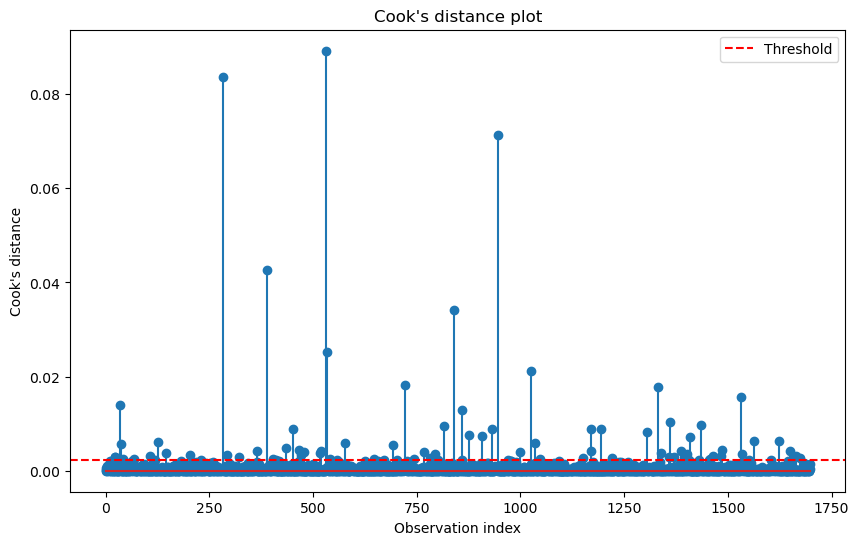

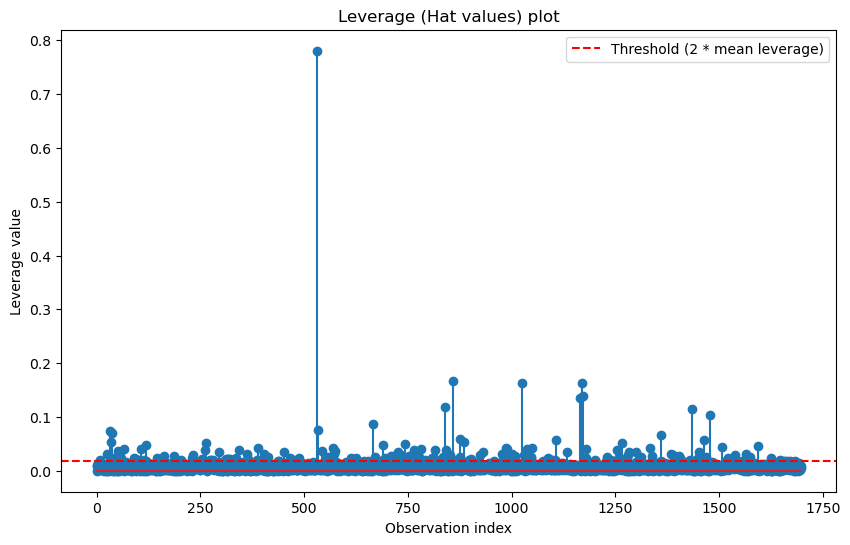

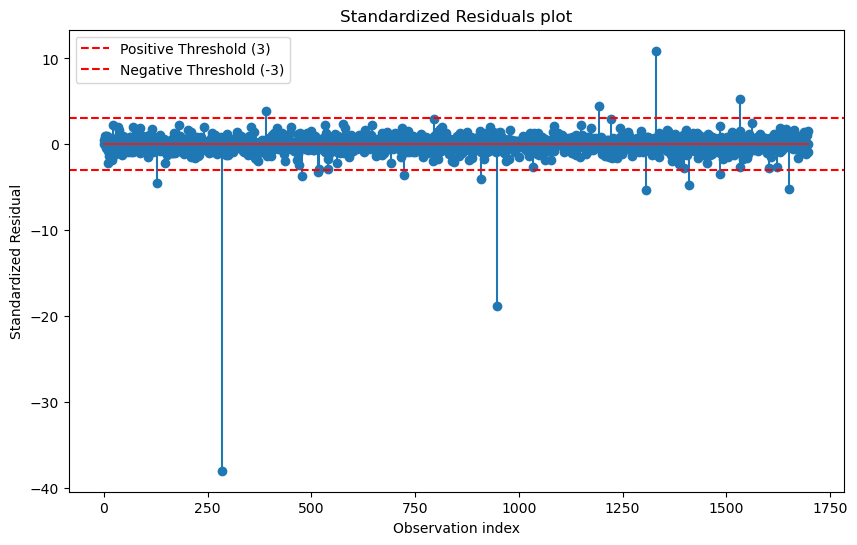

In [256]:
# Calculate influence measures
influence = NS_logit_result.get_influence()

# Cook's Distance 
cooks_distances = influence.cooks_distance[0] # here, outliers of this category are influential points in terms of their impact on the fitted values

# Leverage (hat values)
hat_values = influence.hat_matrix_diag # here, outliers disproportionately influence the estimated coefficients of the model

# Standardized Residuals
standardized_residuals = influence.resid_studentized # here, outliers deviate significantly from the expected pattern predicted by the model

# Define thresholds for identifying outliers
high_cooks_threshold = 4 / len(X_train)
high_leverage_threshold = 2 * np.mean(hat_values) 
high_resid_threshold = 3  

# Find indices where the values exceed these thresholds
high_leverage_indices = np.where(hat_values > high_leverage_threshold)[0]
high_cooks_indices = np.where(cooks_distances > high_cooks_threshold)[0]
high_resid_indices = np.where(np.abs(standardized_residuals) > high_resid_threshold)[0]

# Combine indices of all potential outliers
all_outlier_indices = np.unique(np.concatenate((high_leverage_indices, high_cooks_indices, high_resid_indices)))

# Cook's distances plot
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_distances)), cooks_distances)
plt.title('Cook\'s distance plot')
plt.xlabel('Observation index')
plt.ylabel('Cook\'s distance')
plt.axhline(y=high_cooks_threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()

# Leverage (hat values) plot
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(hat_values)), hat_values)
plt.title('Leverage (Hat values) plot')
plt.xlabel('Observation index')
plt.ylabel('Leverage value')
plt.axhline(y=high_leverage_threshold, color='red', linestyle='--', label='Threshold (2 * mean leverage)')
plt.legend()
plt.show()

# Standardized Residuals Plot
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(standardized_residuals)), standardized_residuals)
plt.title('Standardized Residuals plot')
plt.xlabel('Observation index')
plt.ylabel('Standardized Residual')
plt.axhline(y=high_resid_threshold, color='red', linestyle='--', label='Positive Threshold (3)')
plt.axhline(y=-high_resid_threshold, color='red', linestyle='--', label='Negative Threshold (-3)')
plt.legend()
plt.show()


#### 4.2.4.Remove the Influential Outliers

In [257]:
# Remove these outliers from the data using the indices directly
X_train_cleaned = X_train.drop(X_train.index[all_outlier_indices])
y_train_cleaned = y_train.drop(X_train.index[all_outlier_indices])

# Verify that the training data is smaller than the inital one, signalling outliers' removal
print("Number of municipalities in the X and y datasets after the removal of Vaux-sur_Morges")
print(len(X_train))
print(len(y_train))

print("Number of municipalities in X and y with no outliers:")
print(len(X_train_cleaned))
print(len(y_train_cleaned))

# 1699 vs 1468: all good

Number of municipalities in the X and y datasets after the removal of Vaux-sur_Morges
1699
1699
Number of municipalities in X and y with no outliers:
1498
1498


#### 4.2.5 Use SMOTE to rebalance the Data

In [258]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train) 


# Verify that the training data has been synthetically increased following SMOTE
print("Number of municipalities in X and y post-SMOTE")
print(len(X_train_smote))
print(len(y_train_smote))

# 2342: all good

Number of municipalities in X and y post-SMOTE
2342
2342


#### 4.2.6.Re-scale the "Smoted" Data

In [259]:
# Define which columns are numeric
numeric_features = ['Average_income', 'Tax_burden_80k', 'Tax_burden_150k', 
                    'Percent_age_65_and_over', 'Percent_age_20_39', 'Total_pop_2022', 
                    'SP_percent_19', 'SPD_percent_19', 'Liberal_percent_19', 'PDC_percent_19']

# Set up the ColumnTransformer to only scale numeric features
scaler = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'  # Ensure dummy variables are not scaled
)

# Apply the scaler to the SMOTE-resampled train set and the original test set
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=[c for c in scaler.get_feature_names_out()], index=X_train_smote.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=[c for c in scaler.get_feature_names_out()], index=X_test.index)


#### 4.2.7 Fit a model on the Smoted rescaled data with no outliers

In [260]:
# Add a constant to the predictors
X_train_scaled_with_const = sm.add_constant(X_train_scaled_df)

# Define and fit the logit model using the oversampled, scaled training data with no outliers
oversampled_logit_model = sm.Logit(y_train_smote, X_train_scaled_with_const)
oversampled_logit_result = oversampled_logit_model.fit()

print("Oversampled Logit Regression Summary:")
print(oversampled_logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.335124
         Iterations 10
Oversampled Logit Regression Summary:
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2342
Model:                          Logit   Df Residuals:                     2326
Method:                           MLE   Df Model:                           15
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                  0.5165
Time:                        20:08:09   Log-Likelihood:                -784.86
converged:                       True   LL-Null:                       -1623.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          

The number of observations is larger, the coefficients changed, and the Pseudo R2 increased, suggesting that the previous operations were succesful.

#### 4.2.8 Assessing Multicollinearity between Non-Dummies

In [262]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X_train_scaled_df.columns)

# Re-define the non-dummy features post-scaling
numeric_features = ['num__Average_income', 'num__Tax_burden_80k', 'num__Tax_burden_150k', 
                    'num__Percent_age_65_and_over', 'num__Percent_age_20_39', 'num__Total_pop_2022', 
                    'num__SP_percent_19', 'num__SPD_percent_19', 'num__Liberal_percent_19', 'num__PDC_percent_19']

# Filter the DataFrame to include only non-dummy columns for VIF calculation
numeric_data = X_train_scaled_df[numeric_features]

# Calculate VIFs only for numeric features
vif = pd.DataFrame()
vif["feature"] = numeric_data.columns
vif["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]

print(vif)

Index(['num__Average_income', 'num__Tax_burden_80k', 'num__Tax_burden_150k',
       'num__Percent_age_65_and_over', 'num__Percent_age_20_39',
       'num__Total_pop_2022', 'num__SP_percent_19', 'num__SPD_percent_19',
       'num__Liberal_percent_19', 'num__PDC_percent_19',
       'remainder__French_Region', 'remainder__Italian_Region',
       'remainder__Romansh_Region', 'remainder__Urban_Municipality',
       'remainder__Rural_Municipality'],
      dtype='object')
                        feature        VIF
0           num__Average_income   1.789160
1           num__Tax_burden_80k  12.265977
2          num__Tax_burden_150k  12.644462
3  num__Percent_age_65_and_over   1.853900
4        num__Percent_age_20_39   1.995854
5           num__Total_pop_2022   1.153426
6            num__SP_percent_19   2.178786
7           num__SPD_percent_19   3.429828
8       num__Liberal_percent_19   2.004837
9           num__PDC_percent_19   2.157849


#### 4.2.9 Dealing with Multicollinearity in the tax burden variables

Three options are considered: 
1. Removing one of the tax burden variables
2. PCA
3. Lasso regularisation

*Deleting One of the Variables*

Pros:

- Simple and direct way to reduce multicollinearity.
- Maintains model interpretability since you only work with the original variables.

Cons:

- Losing any unique information that the removed variable could provide.
  
*PCA*

Pros:

- Reduces dimensionality while attempting to retain as much variance as possible.
- Can handle multicollinearity and reduce dataset complexity.

Cons:

- Reduced interpretability of the component as it is a linear combinations of the original variables.

*Lasso Regularization*

Pros:

- Has the potential to retain all variables if multicollinearity is not too strong and alpha is tuned properly. 
- Retains model interpretability to a degree because it keeps the model within the original feature space.
  
Cons:

- Strong multicollinearity might lead alpha to remove even more variables than would happen in the previous methods.


*Conclusion*: Given these points and the desire to maintain both interpretability and as many features as possible for feature importance, I start with Lasso regularization to see if it manages the multicollinearity while still keeping both variables.


##### Lasso Regularisation to deal with Multicollinearity

In [265]:
from sklearn.linear_model import LogisticRegressionCV

# Define a range of smaller C values for stronger regularisation than solely with "free" CV 
Cs = np.logspace(-4, 0, 10)

# Define the model with L1 penalty for all predictors
logistic_l1_model = LogisticRegressionCV(Cs= Cs,cv=5, penalty='l1', solver='liblinear', random_state=42).fit(X_train_scaled_df, y_train_smote)  

# Print the coefficients of the Lasso model to see which coefficients are driven to zero when using CV
coefficients = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Coefficient': logistic_l1_model.coef_[0]
})
print(coefficients)
# The coefficients were lightly affected, with "automatic feature selection" driving the Romansh variable to zero.


                          Feature  Coefficient
0             num__Average_income    -0.247387
1             num__Tax_burden_80k    -1.188299
2            num__Tax_burden_150k     2.182308
3    num__Percent_age_65_and_over    -0.057953
4          num__Percent_age_20_39    -0.011217
5             num__Total_pop_2022    -0.034836
6              num__SP_percent_19     1.302581
7             num__SPD_percent_19     0.115180
8         num__Liberal_percent_19     0.308526
9             num__PDC_percent_19    -0.151044
10       remainder__French_Region     4.893730
11      remainder__Italian_Region     4.499082
12      remainder__Romansh_Region     0.000000
13  remainder__Urban_Municipality     1.155724
14  remainder__Rural_Municipality     0.313348


**Assessing the success of the Lasso Model in dealing with Multicollinearity, and its performance**

In [266]:
# from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score

# 1) Compare VIF to the Oversampled model

# Identify non-zero coefficient features among numeric variables 
non_zero_coef_indices = logistic_l1_model.coef_[0] != 0
non_zero_numeric_features = [feature for i, feature in enumerate(numeric_features) if non_zero_coef_indices[X_train_scaled_df.columns.get_loc(feature)]]

# Filter the DataFrame to include only non-zero coefficient numeric columns for VIF calculation
filtered_data = X_train_scaled_df[non_zero_numeric_features]

# Calculate VIFs only for non-zero coefficient numeric features
vif_lasso = pd.DataFrame()
vif_lasso["feature"] = filtered_data.columns
vif_lasso["VIF"] = [variance_inflation_factor(filtered_data.values, i) for i in range(filtered_data.shape[1])]

print("VIF CV Lasso:")
print(vif_lasso)
print("VIF Original Oversampled:")
print(vif) # Oversampled
# The VIFs are ABSOLUTELY identical


# Trying a different approach by manually setting the regularisation strength - the objective is to keep as many features as possible while dealing with multicollinearity
alpha_value = 0.006  # 0.06 is the minimal penalisation to remove multicollinearity (after trial and error)
manual_lasso_model = Lasso(alpha=alpha_value)
manual_lasso_model.fit(X_train_scaled_df, y_train_smote)

# Identify non-zero coefficient features among numeric variables 
non_zero_coef_indices = manual_lasso_model.coef_ != 0
non_zero_numeric_features = [feature for i, feature in enumerate(numeric_features) if non_zero_coef_indices[X_train_scaled_df.columns.get_loc(feature)]]

# Filter the DataFrame to include only non-zero coefficient numeric columns for VIF calculation
filtered_data = X_train_scaled_df[non_zero_numeric_features]

# Calculate VIFs only for non-zero coefficient numeric features
vif_manual_lasso = pd.DataFrame()
vif_manual_lasso["feature"] = filtered_data.columns
vif_manual_lasso["VIF"] = [variance_inflation_factor(filtered_data.values, i) for i in range(filtered_data.shape[1])]

print("VIF Manual Lasso:")
print(vif_manual_lasso)



VIF CV Lasso:
                        feature        VIF
0           num__Average_income   1.789160
1           num__Tax_burden_80k  12.265977
2          num__Tax_burden_150k  12.644462
3  num__Percent_age_65_and_over   1.853900
4        num__Percent_age_20_39   1.995854
5           num__Total_pop_2022   1.153426
6            num__SP_percent_19   2.178786
7           num__SPD_percent_19   3.429828
8       num__Liberal_percent_19   2.004837
9           num__PDC_percent_19   2.157849
VIF Original Oversampled:
                        feature        VIF
0           num__Average_income   1.789160
1           num__Tax_burden_80k  12.265977
2          num__Tax_burden_150k  12.644462
3  num__Percent_age_65_and_over   1.853900
4        num__Percent_age_20_39   1.995854
5           num__Total_pop_2022   1.153426
6            num__SP_percent_19   2.178786
7           num__SPD_percent_19   3.429828
8       num__Liberal_percent_19   2.004837
9           num__PDC_percent_19   2.157849
VIF Manual Las

Lasso removes 4 variables, including num__Tax_burden_80k, to address multicollinearity. This is not ideal given our goal is to explore feature importance for as many predictors as possible on top of accurate classification (otherwise, feature importance is irrelevant). Thus, despite possible performance improvements, the Lasso model does not seem to be the best approach.

##### Removing Tax Burden at 150k Yearly Salary to deal with Multicollinearity

The 80k tax burden variable is preserved over the 150k because it reflects the tax burden at the average Swiss salary of 81.4k (FSO, 2024), hence likely affects a larger portion of the population. 

In [267]:

reduced_features = [col for col in X_train_scaled_df if col != 'num__Tax_burden_150k']

# Filter the DataFrame to include only the reduced set of numeric columns
X80k = X_train_scaled_df[reduced_features]

# Re-fit the logistic regression model or any other model of choice
oversampled_logit_80k = sm.Logit(y_train_smote, sm.add_constant(X80k))
logit_80k_result = oversampled_logit_80k.fit()

print("Summary of the 80k Logit Model:")
print(logit_80k_result.summary())


# Filter the DataFrame to include only the non-dummy columns in X80k
numeric_features_80k = [feature for feature in numeric_features if feature in X80k.columns]

# Calculate VIFs only for the non-dummy features
vif_80k = pd.DataFrame()
vif_80k["feature"] = numeric_features_80k
vif_80k["VIF"] = [variance_inflation_factor(X80k[numeric_features_80k].values, i) for i in range(len(numeric_features_80k))]

print(vif_80k)



# Predicting probabilities from the 80k model 
logit_80k_pred_probs = logit_80k_result.predict(sm.add_constant(X80k))

# Calculating ROC-AUC for the 80k model
roc_auc_oversampled_logit_80k = roc_auc_score(y_train_smote, logit_80k_pred_probs)
print(f"ROC-AUC for 80k Logit Model: {roc_auc_oversampled_logit_80k}")

Optimization terminated successfully.
         Current function value: 0.353814
         Iterations 10
Summary of the 80k Logit Model:
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2342
Model:                          Logit   Df Residuals:                     2327
Method:                           MLE   Df Model:                           14
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                  0.4896
Time:                        20:16:12   Log-Likelihood:                -828.63
converged:                       True   LL-Null:                       -1623.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.8

We can see this not only improved slightly the model fit (higher pseudo R2) but also dealt with the multicollinearity issue. The ROC-AUC is only very slightly lower (1%), acceptable considering there is no more multicollinearity...

##### Creating a Tax Burden PCA to deal with Multicollinearity

In [741]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


tax_burdens = X_train_scaled_df[['num__Tax_burden_80k', 'num__Tax_burden_150k']]


# Perform PCA
pca = PCA(n_components=1)
tax_burden_PC = pca.fit_transform(tax_burdens)
X_train_scaled_df['Tax_Burden_PCA'] = tax_burden_PC[:, 0]


# Prepare the dataset for the model
X_pca = X_train_scaled_df.drop(['num__Tax_burden_80k', 'num__Tax_burden_150k'], axis=1)
X_pca_with_const = sm.add_constant(X_pca)
y_pca = y_train_smote  

# Fit the PCA model
model_pca = sm.Logit(y_pca, X_pca_with_const)
model_pca_result = model_pca.fit() 




# Filter the DataFrame to include only the non-dummy columns in X_pca
numeric_features_pca = [col for col in X_train_scaled_df.columns if col.startswith('num_')]

# Concatenate the PCA feature with numeric_features and remove old tax burdens
all_pca_numeric_features = [feature for feature in numeric_features_pca if feature not in ['num__Tax_burden_80k', 'num__Tax_burden_150k']] + ['Tax_Burden_PCA']

# Calculate VIFs for all numeric features
vif_pca = pd.DataFrame()
vif_pca["Feature"] = all_pca_numeric_features
vif_pca["VIF"] = [variance_inflation_factor(X_pca_with_const.values, i) for i in range(len(all_pca_numeric_features))]
print("The VIFs of the PCA Logit Model are:")
print(vif_pca)





# Predicting probabilities from the PCA model 
logit_PCA_pred_probs = model_pca_result.predict(X_pca_with_const)

# Calculating ROC-AUC for the PCA model
roc_auc_PCA_logit = roc_auc_score(y_train_smote, logit_PCA_pred_probs)
print(f"ROC-AUC for PCA Logit Model: {roc_auc_PCA_logit}")


# Print the coefficients of the PCA model
print("Coefficients:")
print(model_pca_result.params)


Optimization terminated successfully.
         Current function value: 0.347472
         Iterations 10
The VIFs of the PCA Logit Model are:
                        Feature       VIF
0           num__Average_income  2.625803
1  num__Percent_age_65_and_over  2.124323
2        num__Percent_age_20_39  2.011166
3           num__Total_pop_2022  2.207414
4            num__SP_percent_19  1.206014
5           num__SPD_percent_19  2.356094
6       num__Liberal_percent_19  4.104369
7           num__PDC_percent_19  2.158723
8                Tax_Burden_PCA  2.331151
ROC-AUC for PCA Logit Model: 0.9166543299099136
Coefficients:
const                           -0.821066
num__Average_income             -0.284945
num__Percent_age_65_and_over    -0.045564
num__Percent_age_20_39          -0.076892
num__Total_pop_2022             -0.029053
num__SP_percent_19               1.353141
num__SPD_percent_19              0.111364
num__Liberal_percent_19          0.203850
num__PDC_percent_19             -0.031561


The PCA effectively addressed multicollinearity. Although its ROC-AUC is slightly lower than the oversampled model with all variables, it is only marginally higher than the model with only the 80k tax burden (+0.3%). Most coefficients closely resemble those in the 80k tax burden model. Considering the minimal difference, lower multicollinearity in the 80k model, possibility of direct comparison with the baseline model by statsmodels, and prioritising interpretability, the 80k model is preferred going forward.

#### 4.2.10 Linearity

We examine whether the linearity assumption holds for *continuous variables* (linear relationship between these predictors and the log-odds of the the target variable).

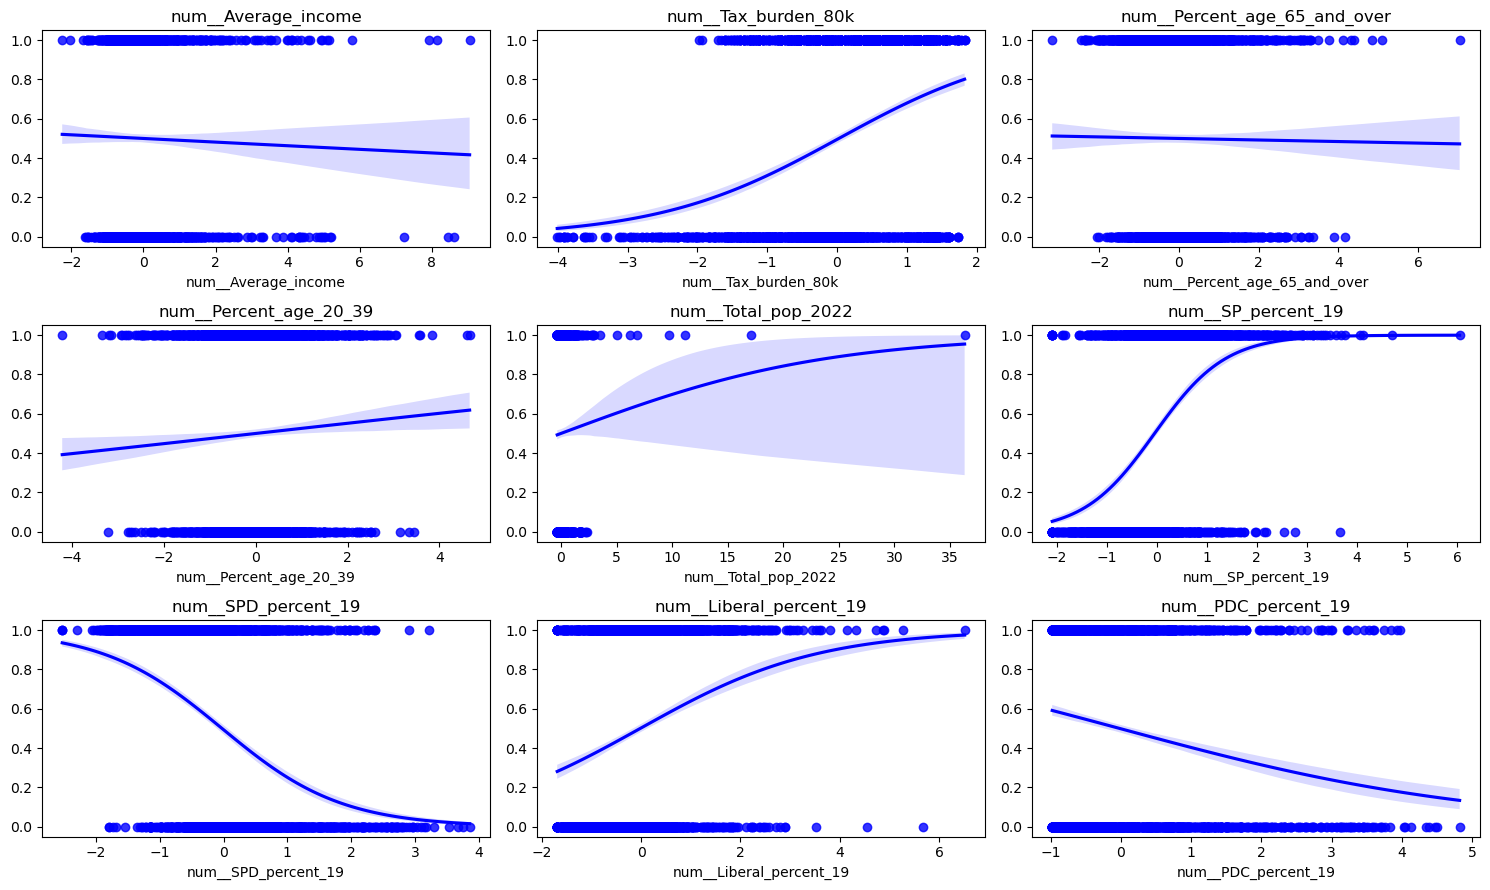

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dimensions of the plot grid
num_vars = 9  # Number of continuous variables 
cols = 3  # Number of columns in the grid
rows = (num_vars + cols - 1) // cols  # Calculate the required number of rows

plt.rcParams["figure.figsize"] = (15, 10)
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 3))




# List of all non-dummy variables in the 80k model
variables = [
    'num__Average_income', 'num__Tax_burden_80k', 'num__Percent_age_65_and_over',
    'num__Percent_age_20_39', 'num__Total_pop_2022', 'num__SP_percent_19',
    'num__SPD_percent_19', 'num__Liberal_percent_19', 'num__PDC_percent_19']

# Flatten the axis array for easy iteration
ax = ax.flatten()

# Plot the continuous variables (logit model fitted between them and y_train_smote, as denoted by logistic=True)
for i, var in enumerate(variables):
    sns.regplot(
        x=var,
        y=y_train_smote, # Dependent variable for the models
        data=X80k,  # Independent variables for the model
        logistic=True, # Model type
        ax=ax[i],
        color='blue'# scatter = True is implicit, so that we see where the actual target values are located
    )
    ax[i].set_title(var)


# Turn off any unused subplots in case the number of variables is not a perfect multiple of `cols`
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()



Interpretation of the plots:

For assessing linearity in logit models, the expectation is a sigmoid shape. The assumption is more or less respected except in the average income and both age variables. We also observe increasing uncertainty (confidence intervals) as the number of observations diminishes. 

If the plots do not show sigmoid-shaped curves, this may indicate a poor fit or the influence of outliers. This is no too concerning in these plots, as each logistic regression is fitted to one predictor at a time. This can exaggerate the impact of outliers because the models lack the moderating effect of additional variables that would be present in the actual 80k model. In addition, any outlier in the present data is expected to have a small impact in the 80k model since influential outliers have already been removed. 

Trying a few transformations for the average income and both age variables.

**Tranformations for Linearity**

In [743]:
# Calculate the minimum positive shift needed to avoid negative or zero values for log transformation
min_positive_shift =1 - X80k[['num__Average_income', 'num__Percent_age_65_and_over', 'num__Percent_age_20_39']].min().min()

# Apply the shift and (log) transform the data
X80k['log_num__Average_income'] = np.log(X80k['num__Average_income'] + min_positive_shift)
X80k['log_num__Percent_age_65_and_over'] = np.log(X80k['num__Percent_age_65_and_over'] + min_positive_shift)
X80k['log_num__Percent_age_20_39'] = np.log(X80k['num__Percent_age_20_39'] + min_positive_shift)


# Squared Transformation
X80k['squared_num__Average_income'] = X80k['num__Average_income'] ** 2
X80k['squared_num__Percent_age_65_and_over'] = X80k['num__Percent_age_65_and_over'] ** 2
X80k['squared_num__Percent_age_20_39'] = X80k['num__Percent_age_20_39'] ** 2

# Checking the new columns
print(X80k[['log_num__Average_income', 'squared_num__Average_income', 'log_num__Percent_age_65_and_over', 
                         'squared_num__Percent_age_65_and_over', 'log_num__Percent_age_20_39', 'squared_num__Percent_age_20_39']].head())
# Transformations were succesful


   log_num__Average_income  squared_num__Average_income  \
0                 1.631211                     0.011579   
1                 1.472503                     0.735358   
2                 1.663867                     0.003847   
3                 1.689857                     0.040416   
4                 1.603459                     0.061242   

   log_num__Percent_age_65_and_over  squared_num__Percent_age_65_and_over  \
0                          1.297379                              2.427287   
1                          1.505620                              0.505119   
2                          1.515873                              0.441255   
3                          1.643263                              0.002084   
4                          1.686512                              0.033468   

   log_num__Percent_age_20_39  squared_num__Percent_age_20_39  
0                    2.053539                        6.644918  
1                    1.926474                        2

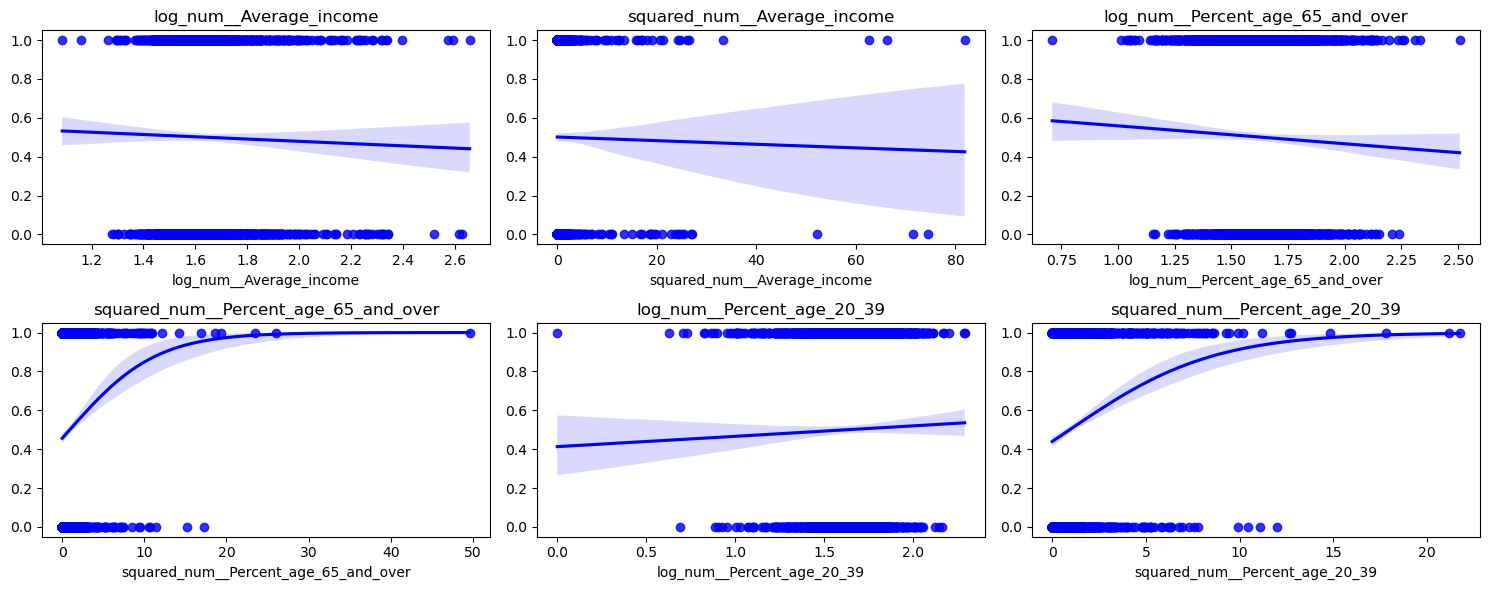

In [744]:
# Define the dimensions of your plot grid
num_vars = 6  # Number of continuous variables 
cols = 3  # Number of columns in the grid
rows = (num_vars + cols - 1) // cols  # Calculate the required number of rows

plt.rcParams["figure.figsize"] = (15, 10)
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 3))




# List the transformed variables
transformed_variables = [
    'log_num__Average_income', 'squared_num__Average_income', 'log_num__Percent_age_65_and_over',
    'squared_num__Percent_age_65_and_over', 'log_num__Percent_age_20_39', 'squared_num__Percent_age_20_39']

# Flatten the axis array for easy iteration
ax = ax.flatten()

# Plot the continuous transformed_variables (logit model fitted between them and y_train_smote, as denoted by logistic=True)
for i, var in enumerate(transformed_variables):
    sns.regplot(
        x=var,
        y=y_train_smote, # Dependent variable for the models
        data=X80k,  # Independent variables for the model
        logistic=True, # Model type
        ax=ax[i],
        color='blue'# scatter = True is implicit, so that we see where the actual target values are located
    )
    ax[i].set_title(var)


# Turn off any unused subplots in case the number of variables is not a perfect multiple of `cols`
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

The transformations had little to no effect on the income variable. Thelog did not improve the age variables much but the squarred transformation did. However, because squarred standardised coefficients are much more complicated to interpret (and less meaningful in themselves), we examine if they cause any substantial improvement in the model that would justify their addition. 

In [746]:
# Remove the unwanted transformed and orinial age variables from X80k
X80k_squarred_age = [col for col in X80k if col not in ['log_num__Average_income', 'squared_num__Average_income', 'log_num__Percent_age_65_and_over',
     'log_num__Percent_age_20_39', 'num__Percent_age_65_and_over', 'num__Percent_age_20_39']]



X80k_squarred_age_df = X80k[X80k_squarred_age] 

# Re-fit the model
squarred_age_logit_80k = sm.Logit(y_train_smote, sm.add_constant(X80k_squarred_age_df))
squarred_age_logit_80k_result = squarred_age_logit_80k.fit()

print("Summary of the Squared Age 80k Logit Model:")
print(squarred_age_logit_80k_result.summary())


# Predicting probabilities
squarred_age_logit_80k_pred_probs = squarred_age_logit_80k_result.predict(sm.add_constant(X80k_squarred_age_df))

# Calculating ROC-AUC for the squarred model and compare with that of the original 80k model
roc_auc_squarred_age_logit = roc_auc_score(y_train_smote, squarred_age_logit_80k_pred_probs)
print(f"ROC-AUC for Squared Age Oversampled Logit Model: {roc_auc_squarred_age_logit}")
print(f"ROC-AUC for 80k Logit Model: {roc_auc_oversampled_logit_80k}") # Compare


Optimization terminated successfully.
         Current function value: 0.350959
         Iterations 10
Summary of the Squared Age 80k Logit Model:
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2342
Model:                          Logit   Df Residuals:                     2327
Method:                           MLE   Df Model:                           14
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.4937
Time:                        14:56:26   Log-Likelihood:                -821.94
converged:                       True   LL-Null:                       -1623.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const      

The performance is very marginaly higher (+0.2%) than on the original 80k model, while the fit is also slightly higher (48.96 vs 49.37 pseudo R2). The coefficients remain similar, except of course for the age variables (since they are squarred their signes inversed and coeff changed). Due to the almost imperceptible changes but loss of interpretability of the squarred variables (in particular due to earlier standardisation), the original 80k model is the final preferred specification.

#### 4.11 Threshold Verification

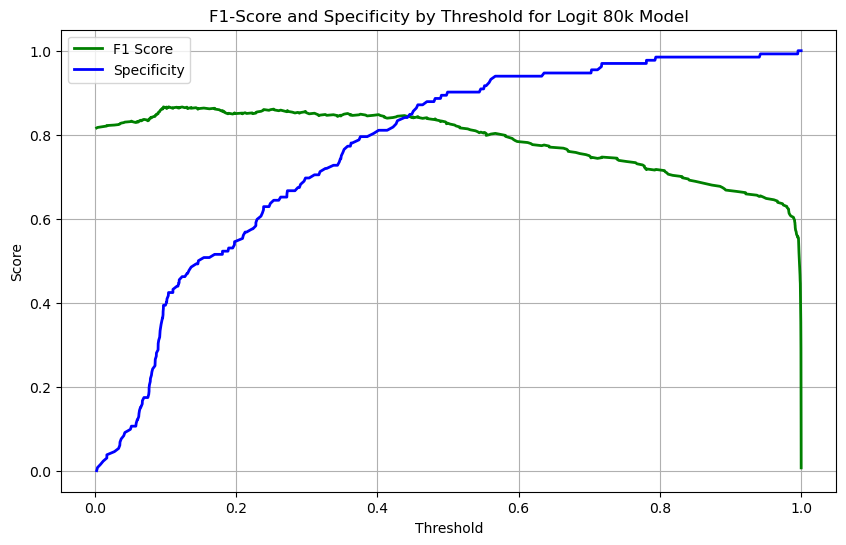

In [273]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix


# Remove the Tax_burden_150k column from the test set as it is not longer in the train set 
# (only run this once as there is nothing to remove afterwards and will lead to an error if repeated)
X_test_scaled_df.drop(columns=['num__Tax_burden_150k'], inplace=True)

# Predicting probabilities for the positive class of the 80k model 
logit_80k_pred_probs = logit_80k_result.predict(sm.add_constant(X_test_scaled_df))

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, logit_80k_pred_probs)

# Ensure that precision and recall arrays have the same length as thresholds
precision = precision[:-1]
recall = recall[:-1]

# Calculate F1-scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Calculate the specificity for each threshold
specificities = []
for thresh in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    binary_predictions = (logit_80k_pred_probs >= thresh).astype(int)
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, binary_predictions)
    TN = cm[0, 0]
    FP = cm[0, 1]
    # Calculate specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)

# Plot F1-scores and Specificity as threshold changes
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', linewidth=2, color='green')
plt.plot(thresholds, specificities, label='Specificity', linewidth=2, color='blue')
plt.title('F1-Score and Specificity by Threshold for Logit 80k Model')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()




## 5. Final Model Evaluation

### 5.1 Final Model Summary Table
Starting by re-running the final model (the one with only the 80k tax burden) for reference:

In [272]:
# Remove the unwanted transformed variables which were previously added to the X80k dataset
X80k_cleaned = [col for col in X80k if col not in ['log_num__Average_income', 'squared_num__Average_income', 'log_num__Percent_age_65_and_over',
     'log_num__Percent_age_20_39', 'squared_num__Percent_age_65_and_over', 'squared_num__Percent_age_20_39']]

X80k = X80k[X80k_cleaned] 


# Run the model on the (re-cleaned) data
oversampled_logit_80k = sm.Logit(y_train_smote, sm.add_constant(X80k))
logit_80k_result = oversampled_logit_80k.fit()

print("Summary of the 80k Logit Model:")
print(logit_80k_result.summary())

Optimization terminated successfully.
         Current function value: 0.353814
         Iterations 10
Summary of the 80k Logit Model:
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2342
Model:                          Logit   Df Residuals:                     2327
Method:                           MLE   Df Model:                           14
Date:                Sun, 21 Apr 2024   Pseudo R-squ.:                  0.4896
Time:                        22:01:57   Log-Likelihood:                -828.63
converged:                       True   LL-Null:                       -1623.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8398      0.093    

### 5.2 Performance and Overfitting of the Final Model

Note: since this is the final  model, we use simpler terms to denote the predictions and predicted probabilities (and AUC,...) as there will be no need to distinguish them from other models.

In [274]:
# We need to start by reformating the test set to account for the removal of the 'Tax_burden_80k' variable 

# Renaming columns to a more readable format 
X80k.rename(columns={
    'num__Average_income': 'Average_income',
    'num__Tax_burden_80k': 'Tax_burden_80k',
    'num__Percent_age_65_and_over': 'Percent_age_65_and_over',
    'num__Percent_age_20_39': 'Percent_age_20_39',
    'num__Total_pop_2022': 'Total_pop_2022',
    'num__SP_percent_19': 'SP_percent_19',
    'num__SPD_percent_19': 'SPD_percent_19',
    'num__Liberal_percent_19': 'Liberal_percent_19',
    'num__PDC_percent_19': 'PDC_percent_19',
    'remainder__French_Region': 'French_Region',
    'remainder__Italian_Region': 'Italian_Region',
    'remainder__Romansh_Region': 'Romansh_Region',
    'remainder__Urban_Municipality': 'Urban_Municipality',
    'remainder__Rural_Municipality': 'Rural_Municipality'
}, inplace=True)

# Renaming columns to a more readable format 
X_test_scaled_df.rename(columns={
    'num__Average_income': 'Average_income',
    'num__Tax_burden_80k': 'Tax_burden_80k',
    'num__Percent_age_65_and_over': 'Percent_age_65_and_over',
    'num__Percent_age_20_39': 'Percent_age_20_39',
    'num__Total_pop_2022': 'Total_pop_2022',
    'num__SP_percent_19': 'SP_percent_19',
    'num__SPD_percent_19': 'SPD_percent_19',
    'num__Liberal_percent_19': 'Liberal_percent_19',
    'num__PDC_percent_19': 'PDC_percent_19',
    'remainder__French_Region': 'French_Region',
    'remainder__Italian_Region': 'Italian_Region',
    'remainder__Romansh_Region': 'Romansh_Region',
    'remainder__Urban_Municipality': 'Urban_Municipality',
    'remainder__Rural_Municipality': 'Rural_Municipality'
}, inplace=True)


# Check columns names in both datasets match
print("Training columns:", X80k.columns)
print("Test columns:", X_test_scaled_df.columns)


# Make predictions on the test and traning sets (threshold of 0.5, the default for binary classification)
y_pred = logit_80k_result.predict(sm.add_constant(X_test_scaled_df)) > 0.5
y_pred_train = logit_80k_result.predict(sm.add_constant(X80k)) > 0.5

# Get predicted probabilities for the test and training sets
y_test_probs = logit_80k_result.predict(sm.add_constant(X_test_scaled_df))
y_train_probs = logit_80k_result.predict(sm.add_constant(X80k))



# Calculating ROC-AUC for the 80k model training data
roc_auc_training = roc_auc_score(y_train_smote, y_train_probs)
print(f"ROC-AUC for the Training Data of the Final Logit Model: {roc_auc_training}")

# Compute ROC curve and AUC for the test data
roc_auc_test = roc_auc_score(y_test, y_test_probs)
print(f"ROC-AUC for the Test Data of the Final Logit Model: {roc_auc_test}")
# Compare these results to check for overfitting



# Create the confusion matrix and classification report for the test set
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Create the confusion matrix and classification report for the training set
conf_matrix_train = confusion_matrix(y_train_smote, y_pred_train)
class_report_train = classification_report(y_train_smote, y_pred_train)

# Display the confusion matrices for the test and training sets
print("Test Data - Confusion Matrix:")
print(conf_matrix)
print("Training Data - Confusion Matrix:")
print(conf_matrix_train)

# Display the results for the training set
print("\nTest Data Classification Report:")
print(class_report)
print("\nTraining Data - Classification Report:")
print(class_report_train)

# Compare these results to check for overfitting




# Look at whether the specificity changes between datasets

# Confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred)

# True negatives are at index [0,0] and false positives are at index [0,1]
true_negatives_test = conf_matrix_test[0,0]
false_positives_test = conf_matrix_test[0,1]

# Specificity calculation for test set
specificity_test = true_negatives_test / (true_negatives_test + false_positives_test)
print(f"Specificity for the Test Data: {specificity_test}")

# Confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train_smote, y_pred_train)

true_negatives_train = conf_matrix_train[0,0]
false_positives_train = conf_matrix_train[0,1]

# Specificity calculation for training set
specificity_train = true_negatives_train / (true_negatives_train + false_positives_train)
print(f"Specificity for the Training Data: {specificity_train}")



Training columns: Index(['Average_income', 'Tax_burden_80k', 'Percent_age_65_and_over',
       'Percent_age_20_39', 'Total_pop_2022', 'SP_percent_19',
       'SPD_percent_19', 'Liberal_percent_19', 'PDC_percent_19',
       'French_Region', 'Italian_Region', 'Romansh_Region',
       'Urban_Municipality', 'Rural_Municipality'],
      dtype='object')
Test columns: Index(['Average_income', 'Tax_burden_80k', 'Percent_age_65_and_over',
       'Percent_age_20_39', 'Total_pop_2022', 'SP_percent_19',
       'SPD_percent_19', 'Liberal_percent_19', 'PDC_percent_19',
       'French_Region', 'Italian_Region', 'Romansh_Region',
       'Urban_Municipality', 'Rural_Municipality'],
      dtype='object')
ROC-AUC for the Training Data of the Final Logit Model: 0.9132661581735086
ROC-AUC for the Test Data of the Final Logit Model: 0.8853811149032994
Test Data - Confusion Matrix:
[[119  13]
 [ 78 215]]
Training Data - Confusion Matrix:
[[1061  110]
 [ 257  914]]

Test Data Classification Report:
          

**Evaluation**:

- There's a high ROC-AUC score for both the training and test sets, with the training one slightly higher, indicating minor overfitting.
- The classification reports show good precision and recall for both classes. Precision is higher for the majority class, while recall is better for the minority class in both datasets. However, the test set shows a larger gap in F1 scores between classes, indicating a greater imbalance in the model's predictive performance across different groups, likely reflecting the imbalance in the test target which is not present in the train target.
- Again, there is some indication of overfitting since the model performs better on the training data than on the test data. However, the difference in performance is not drastic, suggesting the model should still generalise well to new data.
- The specificity between sets is almost equal, indicating good performance at predicting true negatives in both cases.

### 5.3 Feature Importance of the Final Model


Feature Importance and Direction from Training Data:
const                     -0.839842
Average_income            -0.401296
Tax_burden_80k             0.714358
Percent_age_65_and_over   -0.032953
Percent_age_20_39         -0.123434
Total_pop_2022            -0.030860
SP_percent_19              1.307584
SPD_percent_19             0.030064
Liberal_percent_19         0.139089
PDC_percent_19            -0.083325
French_Region              6.599885
Italian_Region             5.466933
Romansh_Region             0.330252
Urban_Municipality         1.110039
Rural_Municipality         0.208859
dtype: float64
Feature Importance Ranked from Highest to Lowest:
French_Region              6.599885
Italian_Region             5.466933
SP_percent_19              1.307584
Urban_Municipality         1.110039
Tax_burden_80k             0.714358
Average_income             0.401296
Romansh_Region             0.330252
Rural_Municipality         0.208859
Liberal_percent_19         0.139089
Percent_age_20_39

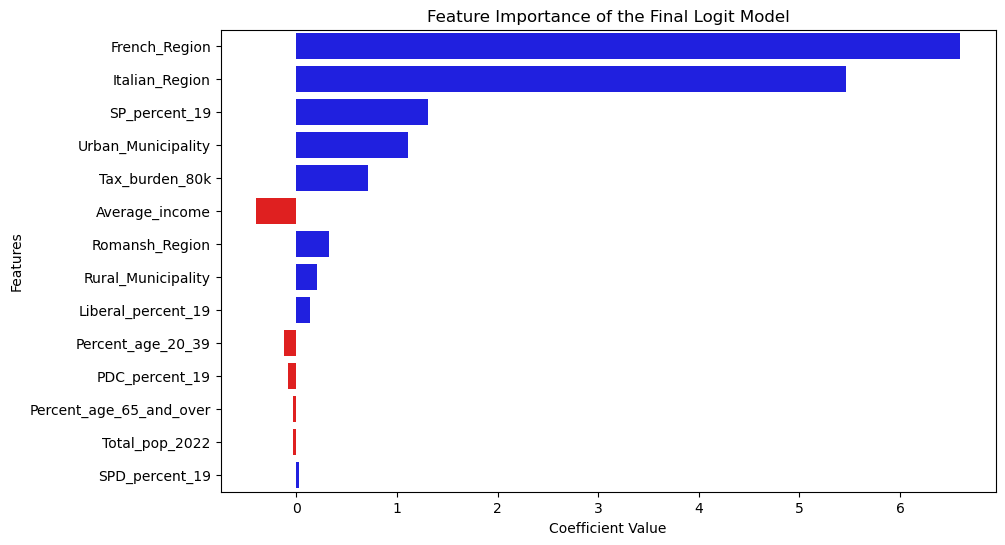

In [275]:

# Feature importance

# 1) See features without modication to understand direction of effects:
print("\nFeature Importance and Direction from Training Data:")
print(logit_80k_result.params)

# 2) Ranking features
# Get the coefficients from the model on the training data and drop the 'const' term
coefficients = logit_80k_result.params.drop('const')

# Sort the features by the absolute value of their coefficients in descending order
sorted_features = coefficients.abs().sort_values(ascending=False)

print("Feature Importance Ranked from Highest to Lowest:")
print(sorted_features)


# Feature importance plot

# drop the intercept
coefficients = logit_80k_result.params.drop('const')   

# Create a DataFrame from the coefficients for easier manipulation
coefficients_df = pd.DataFrame({
    'Variable': coefficients.index,
    'Coefficient': coefficients.values
})

# Sort the DataFrame by the absolute value of coefficients in descending order for visualization
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Determine the colour based on the coefficient value
colours = ['red' if x < 0 else 'blue' for x in coefficients_df['Coefficient']]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coefficients_df, palette =colours )
plt.title('Feature Importance of the Final Logit Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

# Random Forest Model

Ensure to reload the data through the set up section to remove all changes made to it in the Logit Model part of the Notebook.

## 1. Set Up 

In [279]:
# Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Suppressing warnings
import warnings
warnings.filterwarnings(action='ignore')



# Load the data
Data_clean = pd.read_csv("ML_final_data_clean.csv")

# Identify and remove Vaux-sur-Morges before any further processing 
vaux_index = Data_clean[Data_clean['Municipality_name'] == 'Vaux-sur-Morges'].index
if not vaux_index.empty:
    Data_clean.drop(index=vaux_index, inplace=True)
    print("Vaux-sur-Morges has been removed from the dataset.")
else:
    print("Vaux-sur-Morges not found in the dataset.")

# Verify that Cologny is the new municipality with the highest average income in the country
highest_income = Data_clean[Data_clean['Average_income'] == Data_clean['Average_income'].max()]
print(highest_income[['Municipality_name', 'Average_income']])

# Reset the index after modifications to ensure alignment
Data_clean.reset_index(drop=True, inplace=True)

# Create a mapping table for sample indices
mapping_table = Data_clean[['Municipality_name']].reset_index()

# Define X and y columns
X_columns = ['Average_income', 'Tax_burden_80k', 'Tax_burden_150k', 
          'Percent_age_65_and_over', 'Percent_age_20_39','Total_pop_2022',
          'SP_percent_19', 'SPD_percent_19', 'Liberal_percent_19',
          'PDC_percent_19', 'French_Region', 'Italian_Region', 'Romansh_Region',
                  'German_Region', 'Urban_Municipality', 'Suburban_Municipality', 'Rural_Municipality']
Y_column = ['Referendum_pass']

X = Data_clean[X_columns]
Y = Data_clean[Y_column].values.ravel()  # Use .ravel() to convert Y to a 1D array for use in scikit-learn.


Vaux-sur-Morges has been removed from the dataset.
     Municipality_name  Average_income
2046           Cologny          402.12


Descriptive statistics and the distribution of variables and classes mirror those presented in the Logit setup section and are therefore not reiterated here.

## 2. Split Data into Test and Train

The data is divided into test and training sets, with a ratio of 20% for the former and 80% for the latter. The mapping table is split simultaneously to maintain index alignment. Stratified dataset splitting ensures that both training and test sets retain the original class distribution, particularly important for model training and evaluation with our imbalanced dataset.

In [281]:
X_train, X_test, Y_train, Y_test, train_mapping_table, test_mapping_table = train_test_split(
    X, Y, mapping_table, train_size=0.80, random_state=42, stratify=Y) 

## 3. Baseline RF Model

In [220]:
# Baseline Random Forest model with default parameters
baseline_rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
baseline_rf_model.fit(X_train, Y_train)


# Evaluate the baseline model on the test data
Y_pred_baseline=baseline_rf_model.predict(X_test)
print("Classification Report for Test Data:")
print(classification_report(Y_test, Y_pred_baseline))

# Evaluate the baseline model on the training data to determine if there is over-fitting
Y_pred_baseline_train=baseline_rf_model.predict(X_train)
print("Classification Report for Training Data:")
print(classification_report(Y_train, Y_pred_baseline_train))




# Predict probabilities for the baseline model on the test and train data
probs_baseline = baseline_rf_model.predict_proba(X_test)[:, 1]
probs_baseline_train = baseline_rf_model.predict_proba(X_train)[:, 1]

# Compute ROC curve and AUC for the baseline model on the test data
fpr_baseline, tpr_baseline, _ = roc_curve(Y_test, probs_baseline)
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)
print("Baseline Test ROC-AUC:", roc_auc_baseline)

# Compute ROC curve and AUC for the baseline model on the train data
fpr_baseline_train, tpr_baseline_train, _ = roc_curve(Y_train, probs_baseline_train)
roc_auc_baseline_train = auc(fpr_baseline_train, tpr_baseline_train)
print("Baseline Train ROC-AUC:", roc_auc_baseline_train)




# Calculate the confusion matrix for the test data
cm_test = confusion_matrix(Y_test, Y_pred_baseline)
TN_test = cm_test[0, 0]
FP_test = cm_test[0, 1]
specificity_test = TN_test / (TN_test + FP_test) if (TN_test + FP_test) > 0 else 0

# Calculate the confusion matrix for the training data
cm_train = confusion_matrix(Y_train, Y_pred_baseline_train)
TN_train = cm_train[0, 0]
FP_train = cm_train[0, 1]
specificity_train = TN_train / (TN_train + FP_train) if (TN_train + FP_train) > 0 else 0

# Print the specificity results
print("Test Data - Specificity:", specificity_test)
print("Training Data - Specificity:", specificity_train)


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       132
           1       0.89      0.87      0.88       293

    accuracy                           0.83       425
   macro avg       0.80      0.81      0.81       425
weighted avg       0.83      0.83      0.83       425

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       528
           1       1.00      1.00      1.00      1171

    accuracy                           1.00      1699
   macro avg       1.00      1.00      1.00      1699
weighted avg       1.00      1.00      1.00      1699

Baseline Test ROC-AUC: 0.9243458475540387
Baseline Train ROC-AUC: 0.9999999999999999
Test Data - Specificity: 0.75
Training Data - Specificity: 1.0


**Analysis of the Test Set**

- The model performs better at identifying class 1 than class 0, as indicated by higher precision, recall, and F1-scores for class 1. This is likely due to the previously observed class imbalance, where 1 is the majority class (293 vs 132 in the test set and 1171 vs. 528 in the training set).
- While performance metrics are relatively good for the test set, the model achieves perfect scores in all metrics on the training set. This discrepancy indicates that the model is likely overfitting.
- The baseline AUC score is really good and higher than the baseline logit model AUC.

**Overfitting**

- There is marked overfitting, with the training model scoring 100% in all metrics.

## 4. Itterative Validation Curves to define optimal GridSearch CV Ranges

We conduct two rounds of validation curves to pinpoint optimal hyperparameter values, streamlining the subsequent Grid Search. Beginning with a default model, we iteratively incorporate insights from previous curves into new parameters. Repeated stratified K fold cross validation is employed to minimise variance. Validation curves involve changing only one variable at a time while keeping others constant, reducing computation cost and enabling 3 rounds of cross-validation. Our primary aim is to maximise the F-1 score, ensuring robust prediction performance for both 'for' and 'against' votes in the referendum. We also seek to minimise overfitting and standard deviation to maintain model generalisability.

#### Round 1 - Validation Curve for the Maximum Depth of Trees - Starting with Default Parameters

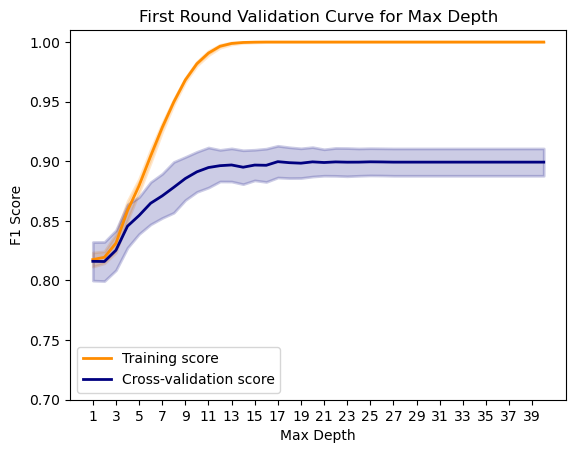

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, RepeatedStratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Setting the range for the max_depth parameter
param_range = np.arange(1, 41)  # Considering depths from 1 to 40

# Calculating training and test scores for various values of max_depth on a model with default parameters
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)  # Repeated Stratified KFold CV
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42, class_weight='balanced'),  
    X_train, Y_train, 
    param_name="max_depth", 
    param_range=param_range,
    cv=cv, 
    scoring="f1",  # Scoring metric set to F1 score
    n_jobs=-1
)

# Calculating mean and standard deviation for training and test set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the validation curve
plt.figure()
plt.title("First Round Validation Curve for Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.ylim(0.7, 1.01) 
plt.xticks(np.arange(min(param_range), max(param_range)+1, 2))
plt.plot(param_range, train_scores_mean, label="Training score",
         color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
         color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()


To minimise overfitting and optimise performance, we aim for a narrow gap between training and cross-validation F1 scores while maximising the F1 score for the cross-validation line. With a max_depth of 7, this balance is achieved, as increasing depth may marginally improve performance but significantly widens the gap between the two scores, indicating overfitting. The standard deviation remains relatively constant, suggesting consistency across folds.

#### Round 1 - Validation Curve for the Minimum Number of Samples in a RF Split

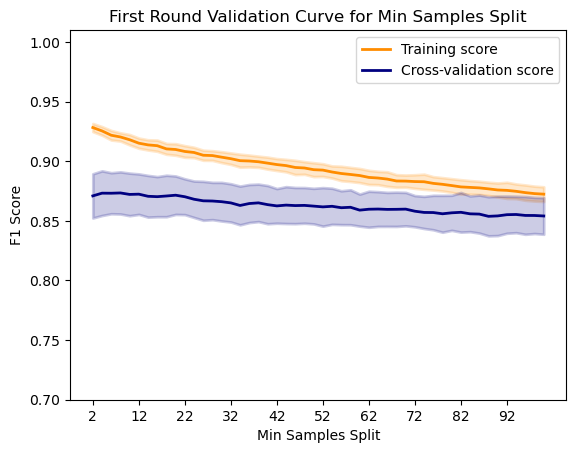

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, RepeatedStratifiedKFold
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Range of values for the min_samples_split parameter
param_range = np.arange(2, 101, 2)  # Trying values from 2 to 100

# Calculate training and validation scores using validation_curve
train_scores, test_scores = validation_curve(
    RandomForestClassifier(max_depth=7, random_state=42, class_weight='balanced'),  # Using previously tuned max_depth and balanced weighting
    X_train, Y_train, 
    param_name="min_samples_split", 
    param_range=param_range,
    
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42),  # Repeated Stratified KFold CV
    scoring="f1",  # Scoring metric set to F1 score
    n_jobs=-1
)

# Calculate the mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the validation curve
plt.figure()
plt.title("First Round Validation Curve for Min Samples Split")
plt.xlabel("Min Samples Split")
plt.ylabel("F1 Score")
plt.ylim(0.7, 1.01)  
plt.xticks(np.arange(min(param_range), max(param_range)+1, 10))  # x-axis tick adjustment 
plt.plot(param_range, train_scores_mean, label="Training score",
         color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
         color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()



As min_samples_split increases from 2 to 100, the cross-validation F1 score decreases by approximately 0.01, while overfitting reduces from about 0.05 to 0.02. The min_samples_split yielding the highest F1 score with minimal overfitting is 94, serving as the reference point hereafter. Standard deviations remain relatively stable across the range.

#### Round 1 - Validation Curve for the Minimum Number of Samples in a Leaf

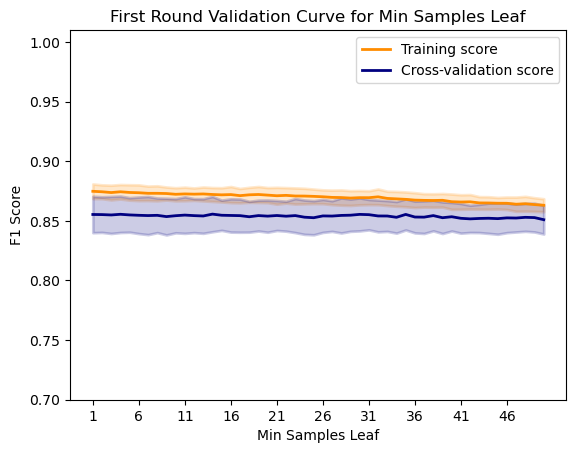

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, RepeatedStratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Range of values for the min_samples_leaf parameter
param_range = np.arange(1, 51)  # Trying values from 1 to 50

# Calculate training and validation scores using validation_curve
train_scores, test_scores = validation_curve(
    RandomForestClassifier(max_depth=7, min_samples_split=94, random_state=42, class_weight='balanced'),  # Using previously tuned max_depth, min_samples_split, and balanced weighting
    X_train, Y_train, 
    param_name="min_samples_leaf", 
    param_range=param_range,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42),  # Repeated Stratified KFold CV
    scoring="f1",  # Scoring metric set to F1 score
    n_jobs=-1
)

# Calculate the mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Plotting the validation curve
plt.figure()
plt.title("First Round Validation Curve for Min Samples Leaf")
plt.xlabel("Min Samples Leaf")
plt.ylabel("F1 Score")
plt.ylim(0.7, 1.01)  
plt.xticks(np.arange(min(param_range), max(param_range)+1, 5))  # x-axis tick adjustment 
plt.plot(param_range, train_scores_mean, label="Training score",
         color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
         color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=2)

plt.legend(loc="best")
plt.show()


The cross-validation scores remain relatively constant across the range of min_samples_leaf values, with a minor decrease in overfitting observed. The optimal point, balancing F1 score maximisation and overfitting minimisation, occurs at min_samples_leaf = 36. Standard deviation remains relatively stable throughout.


#### Round 1 - Validation Curve for the Number of Trees in a Forest

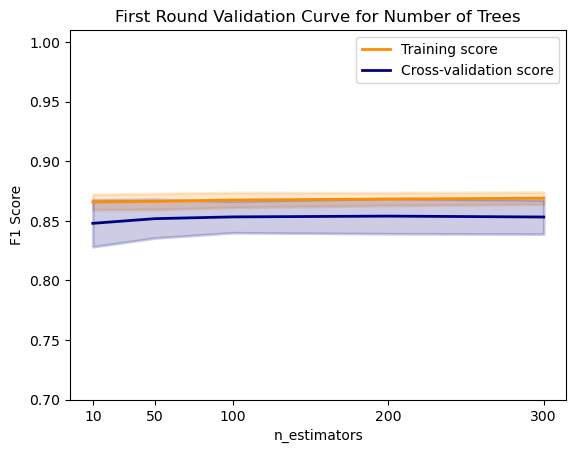

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, RepeatedStratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Range of values to assess for the n_estimators parameter
param_range = [10, 50, 100, 200, 300] 

# Calculate training and validation scores using validation_curve
train_scores, test_scores = validation_curve(
    RandomForestClassifier(max_depth=7, min_samples_split=94, min_samples_leaf=36, random_state=42, class_weight='balanced'),  # Using previously tuned parameters
    X_train, Y_train, 
    param_name="n_estimators", 
    param_range=param_range,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42),  # Repeated Stratified KFold CV
    scoring="f1",  # Scoring metric set to F1 score
    n_jobs=-1
)

# Calculate the mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the validation curve
plt.figure()
plt.title("First Round Validation Curve for Number of Trees")
plt.xlabel("n_estimators")
plt.ylabel("F1 Score")
plt.ylim(0.7, 1.01)  
plt.xticks(param_range)  # x-axis tick adjustment 
plt.plot(param_range, train_scores_mean, label="Training score",
         color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
         color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()



The optimal number of trees is 50, where both the cross-validation and training F1 scores reach their peak. Overfitting and standard deviations remain relatively constant across the range of n_estimators (minor diminution).

#### Round 2 - Validation Curve for the Maximum Depth of Trees - Based on 1st Round Tuning

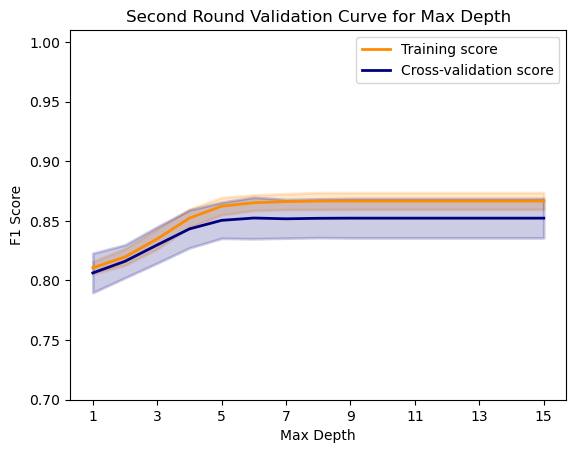

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, RepeatedStratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Setting the range for the max_depth parameter based on round 1 findings
param_range = np.arange(1, 16)  # Considering depths from 1 to 15 (round 1 optimal value = 7)

# Calculating training and test scores for various values of max_depth, accounting for round 1 findings
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)  # Repeated Stratified KFold CV
train_scores, test_scores = validation_curve(
    RandomForestClassifier(min_samples_split=94, min_samples_leaf=36, n_estimators= 50, random_state=42, class_weight='balanced'),  
    X_train, Y_train, 
    param_name="max_depth", 
    param_range=param_range,
    cv=cv, 
    scoring="f1",  # Scoring metric set to F1 score
    n_jobs=-1
)

# Calculating mean and standard deviation for training and test set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the validation curve
plt.figure()
plt.title("Second Round Validation Curve for Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.ylim(0.7, 1.01)  
plt.xticks(np.arange(min(param_range), max(param_range)+1, 2))
plt.plot(param_range, train_scores_mean, label="Training score",
         color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
         color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()


Performance for both models notably increases as max_depth ranges from 1 to 6, after which it plateaus. Standard deviation is relatively constant. Max_depth = 6 becomes the preferred specification.

#### Round 2 - Validation Curve for the Minimum Number of Samples in a RF Split

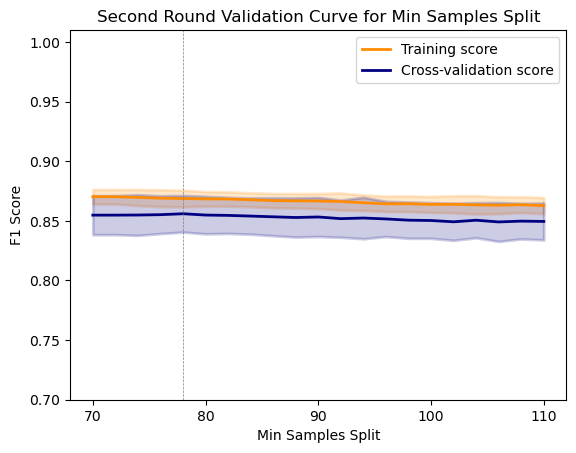

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, RepeatedStratifiedKFold
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Range of values for the min_samples_split parameter based on round 1
param_range = np.arange(70, 111, 2)  # Trying values from 70 to 110

# Calculate training and validation scores using validation_curve
train_scores, test_scores = validation_curve(
    RandomForestClassifier(max_depth = 6, min_samples_leaf=36, n_estimators= 50, random_state=42, class_weight='balanced'),  # Using round 1 results and balanced weighting
    X_train, Y_train, 
    param_name="min_samples_split", 
    param_range=param_range,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42),  # Repeated Stratified KFold CV
    scoring="f1",  # Scoring metric set to F1 score
    n_jobs=-1
)

# Calculate the mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Find the index of the parameter that gives the highest cross-validation score
best_index = np.argmax(test_scores_mean)

# Get the corresponding optimal min_samples_split value
optimal_min_samples_split = param_range[best_index]

# Plotting the validation curve
plt.figure()
plt.title("Second Round Validation Curve for Min Samples Split")
plt.xlabel("Min Samples Split")
plt.ylabel("F1 Score")
plt.ylim(0.7, 1.01)  
plt.xticks(np.arange(min(param_range), max(param_range)+1, 10))  # x-axis tick adjustment 
plt.plot(param_range, train_scores_mean, label="Training score",
         color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
         color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=2)


# Add grey vertical dashed line where the highest Cross-Validation F1 score is
plt.axvline(x=optimal_min_samples_split, linestyle='--', color='gray', linewidth=0.5)


plt.legend(loc="best")
plt.show()


The training and cross-validation models show almost perfectly consistent performance, with stable levels of overfitting and standard deviations. Based on this stability, I identified the optimal min_samples_split value as 78, corresponding to the highest F1 score on the cross-validation curve, denoted by the grey dashed line.

#### Round 2 - Validation Curve for the Minimum Number of Samples in a Leaf

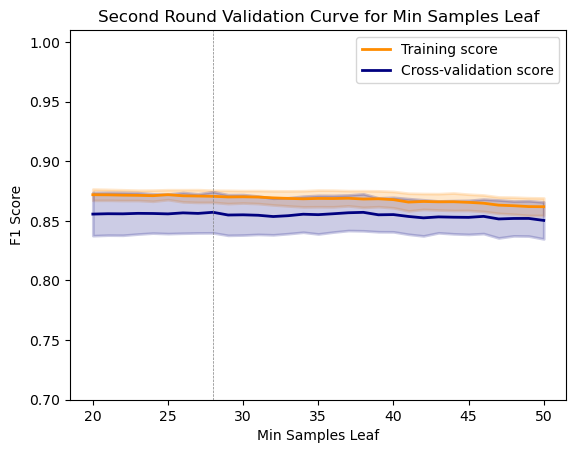

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, RepeatedStratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Range of values for the min_samples_leaf parameter based on previous results
param_range = np.arange(20, 51)  # Trying values from 20 to 50

# Calculate training and validation scores using validation_curve
train_scores, test_scores = validation_curve(
    RandomForestClassifier(max_depth = 6, min_samples_split=78, n_estimators= 50, random_state=42, class_weight='balanced'),  # Using previous insights and balanced weighting
    X_train, Y_train, 
    param_name="min_samples_leaf", 
    param_range=param_range,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42),  # Repeated Stratified KFold CV
    scoring="f1",  # Scoring metric set to F1 score
    n_jobs=-1
)

# Calculate the mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Find the index of the parameter that gives the highest cross-validation score
best_index = np.argmax(test_scores_mean)

# Get the corresponding optimal min_samples_split value
optimal_min_samples_split = param_range[best_index]


# Plotting the validation curve
plt.figure()
plt.title("Second Round Validation Curve for Min Samples Leaf")
plt.xlabel("Min Samples Leaf")
plt.ylabel("F1 Score")
plt.ylim(0.7, 1.01)  
plt.xticks(np.arange(min(param_range), max(param_range)+1, 5))  # x-axis tick adjustment 
plt.plot(param_range, train_scores_mean, label="Training score",
         color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
         color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=2)


# Add grey vertical dashed line where the highest Cross-Validation F1 score is
plt.axvline(x=optimal_min_samples_split, linestyle='--', color='gray', linewidth=0.5)


plt.legend(loc="best")
plt.show()


The training and cross-validation models show consistent performance, with stable levels of overfitting (very minor decrease) and standard deviations. Based on this stability, I identified the optimal min_samples_leaf value as 27, corresponding to the highest F1 score on the cross-validation curve, denoted by the grey dashed line.

#### Round 2 - Validation Curve for the Number of Trees in a Forest

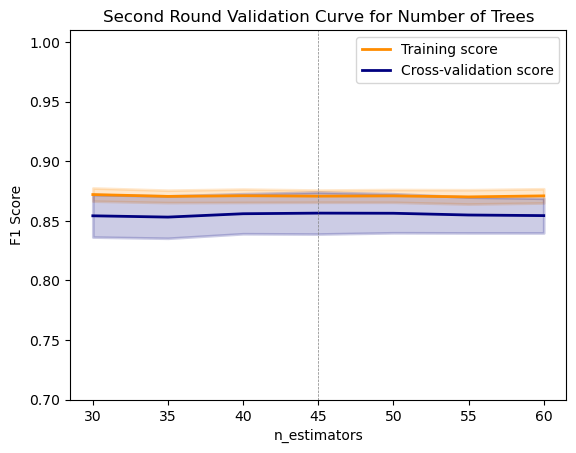

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, RepeatedStratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Range of values to assess for the n_estimators parameter
param_range = [30, 35, 40, 45, 50, 55, 60] 

# Calculate training and validation scores using validation_curve
train_scores, test_scores = validation_curve(
    RandomForestClassifier(max_depth=6, min_samples_split=78, min_samples_leaf=27, random_state=42, class_weight='balanced'),  # Using previously tuned parameters
    X_train, Y_train, 
    param_name="n_estimators", 
    param_range=param_range,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42),  # Repeated Stratified KFold CV
    scoring="f1",  # Scoring metric set to F1 score
    n_jobs=-1
)

# Calculate the mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


# Find the index of the parameter that gives the highest cross-validation score
best_index = np.argmax(test_scores_mean)

# Get the corresponding optimal min_samples_split value
optimal_min_samples_split = param_range[best_index]


# Plotting the validation curve
plt.figure()
plt.title("Second Round Validation Curve for Number of Trees")
plt.xlabel("n_estimators")
plt.ylabel("F1 Score")
plt.ylim(0.7, 1.01)  
plt.xticks(param_range)  # x-axis tick adjustment 
plt.plot(param_range, train_scores_mean, label="Training score",
         color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
         color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=2)

# Add grey vertical dashed line where the highest Cross-Validation F1 score is
plt.axvline(x=optimal_min_samples_split, linestyle='--', color='gray', linewidth=0.5)

plt.legend(loc="best")
plt.show()



The training and cross-validation models show consistent performance, with stable levels of overfitting and standard deviations. I identified the optimal n_estimators value as 45, corresponding to the highest F1 score on the cross-validation curve, denoted by the grey dashed line. 

#### Figure with the 8 Validation Curves

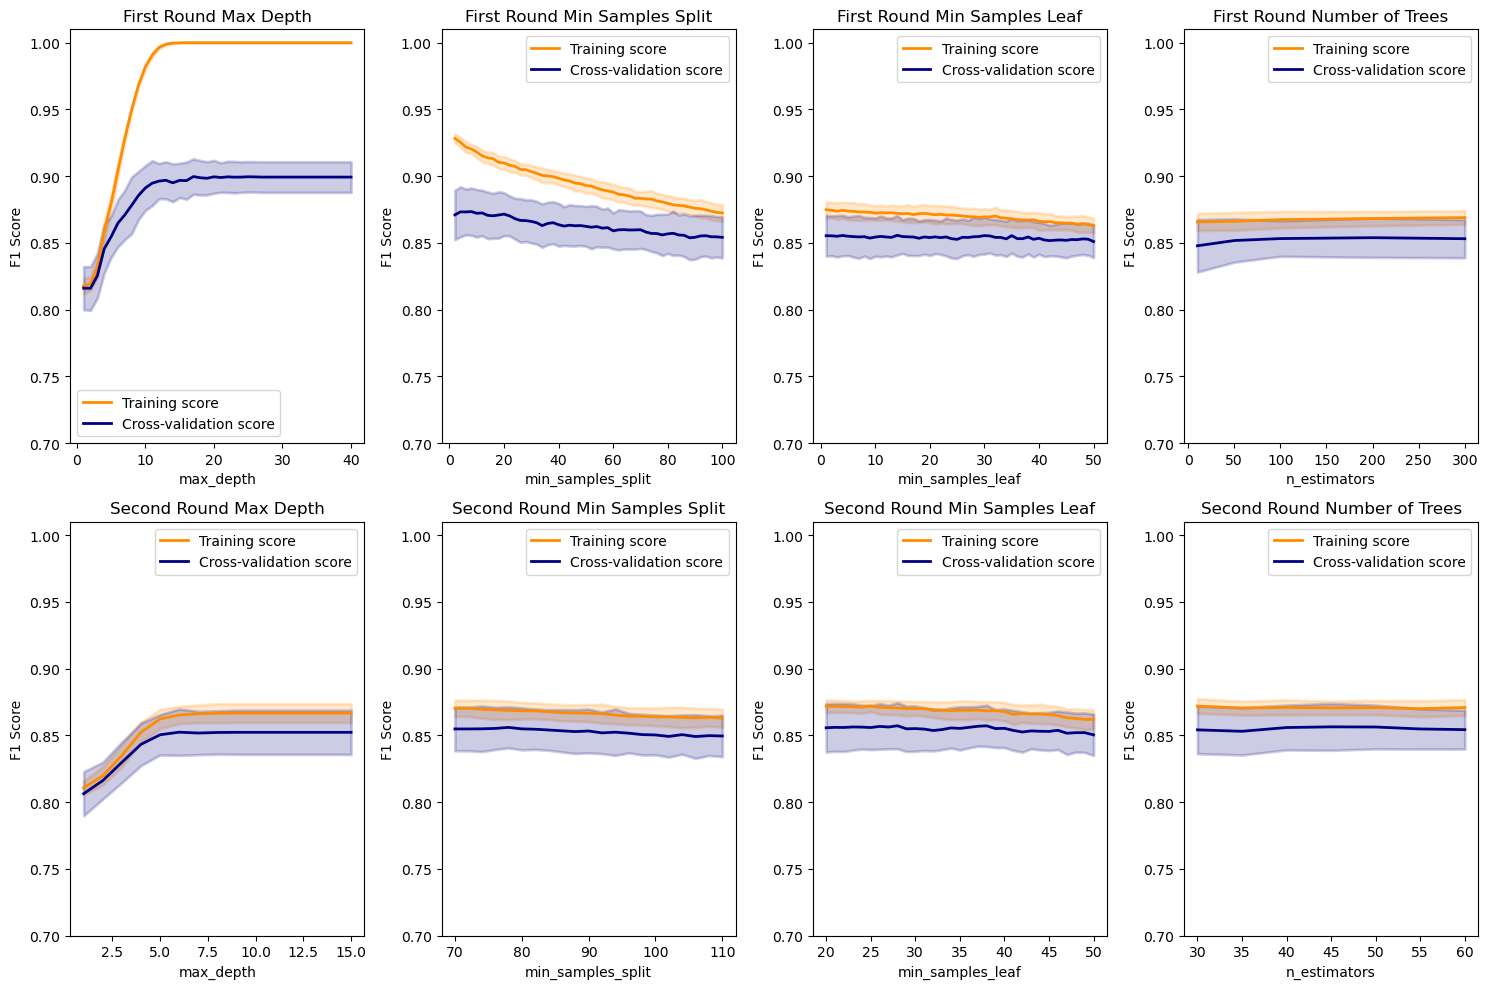

In [69]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, RepeatedStratifiedKFold
import numpy as np

# Parameters and settings for validation curves
param_settings = [
    {"param_name": "max_depth", "param_range": np.arange(1, 41), "title": "First Round Max Depth", "fixed_params": {"min_samples_split": None, "min_samples_leaf":None, "n_estimators":None }},
    {"param_name": "min_samples_split", "param_range": np.arange(2, 101, 2), "title": "First Round Min Samples Split", "fixed_params": {"max_depth": 7, "min_samples_leaf":None, "n_estimators":None}},
    {"param_name": "min_samples_leaf", "param_range": np.arange(1, 51), "title": "First Round Min Samples Leaf", "fixed_params": {"max_depth": 7, "min_samples_split": 94, "n_estimators": None}},
    {"param_name": "n_estimators", "param_range": [10, 50, 100, 200, 300], "title": "First Round Number of Trees", "fixed_params": {"max_depth": 7, "min_samples_split": 94, "min_samples_leaf": 36}},
    {"param_name": "max_depth", "param_range": np.arange(1, 16), "title": "Second Round Max Depth", "fixed_params": {"min_samples_split": 94, "min_samples_leaf": 36, "n_estimators": 50}},
    {"param_name": "min_samples_split", "param_range": np.arange(70, 111, 2), "title": "Second Round Min Samples Split", "fixed_params": {"max_depth": 6, "min_samples_leaf": 36, "n_estimators": 50}},
    {"param_name": "min_samples_leaf", "param_range": np.arange(20, 51), "title": "Second Round Min Samples Leaf", "fixed_params": {"max_depth": 6, "min_samples_split": 78, "n_estimators": 50}},
    {"param_name": "n_estimators", "param_range": [30, 35, 40, 45, 50, 55, 60], "title": "Second Round Number of Trees", "fixed_params": {"max_depth": 6, "min_samples_split": 78, "min_samples_leaf": 27}}
]

# Setup for plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.ravel()

# Iterate over param_settings
for i, params in enumerate(param_settings):
    # Set the fixed parameter values
    fixed_params = params["fixed_params"]
    # Create a dictionary containing all parameters for the classifier
    classifier_params = {param: fixed_params[param] if param in fixed_params else None for param in ["max_depth", "min_samples_split", "min_samples_leaf", "n_estimators"]}
    # Remove any None values
    classifier_params = {k: v for k, v in classifier_params.items() if v is not None}

    # Calculate training and validation scores using validation_curve
    train_scores, test_scores = validation_curve(
        RandomForestClassifier(random_state=42, class_weight='balanced', **classifier_params),
        X_train, Y_train,
        param_name=params["param_name"],
        param_range=params["param_range"],
        cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42),
        scoring="f1",
        n_jobs=-1
    )

    # Calculate mean and standard deviation for training and test set scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plotting the validation curve
    ax = axes[i]
    ax.set_title(params["title"])
    ax.set_xlabel(params["param_name"])
    ax.set_ylabel("F1 Score")
    ax.set_ylim(0.7, 1.01)
    ax.plot(params["param_range"], train_scores_mean, label="Training score", color="darkorange", lw=2)
    ax.fill_between(params["param_range"], train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=2)
    ax.plot(params["param_range"], test_scores_mean, label="Cross-validation score", color="navy", lw=2)
    ax.fill_between(params["param_range"], test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=2)
    ax.legend(loc="best")

plt.tight_layout()
plt.show()


## 5. GridSearch CV and Threshold Verification

Building upon insights from the previous validation curves, we identify the optimal hyperparameters for the model through Grid Search. To address the imbalance in the target variable, reweighting is applied. To enhance robustness and minimise variance, repeated stratified k-fold validation is utilised. To manage computational resources, this validation is restricted to 2 repetitions.

### 5.1 Feature Selection with GridSearch

In [277]:
from sklearn.model_selection import GridSearchCV 


# Create the parameter grid
param_grid = {
    'max_depth': list(range(2, 11, 2)),  # Depths from 2 to 10, with intervals of 2
    'min_samples_split': list(range(70, 91, 5)),  # min_samples_split from 70 to 90, with intervals of 5
    'min_samples_leaf': list(range(20, 37, 2)),  # min_samples_leaf from 20 to 36, with intervals of 2
    'n_estimators': [40, 45, 50] # Number of decision trees to test: 40, 45, 50
}

# Create a model
Reweighted_model = RandomForestClassifier(random_state=42, class_weight='balanced')# Instantiate the grid search Reweighted_model

grid_search = GridSearchCV(estimator = Reweighted_model, param_grid = param_grid, 
                          cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42), # Repeated Stratified CV (5 folds repeated twice)
                           scoring='f1'
                           , n_jobs = -1 # use all processors
                            , verbose = 2 # what to display
                          )


grid_search.fit(X, Y)
Reweighted_model = grid_search.best_estimator_
CV_pred_reweighted=Reweighted_model.predict(X_test)



Fitting 10 folds for each of 675 candidates, totalling 6750 fits
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=70, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=70, n_estimators=45; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=70, n_estimators=45; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=70, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=75, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=75, n_estimators=45; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=75, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=80, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=20, min_samples_split=80, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, min_

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- German_Region
- Suburban_Municipality


### 5.2 Threshold Verification

Because equal importance is granted to true positive and true negatives and the latter are not incorporated into the F1 score calculation, we plot them to assess the adequacy of the default threshold of 0.5.

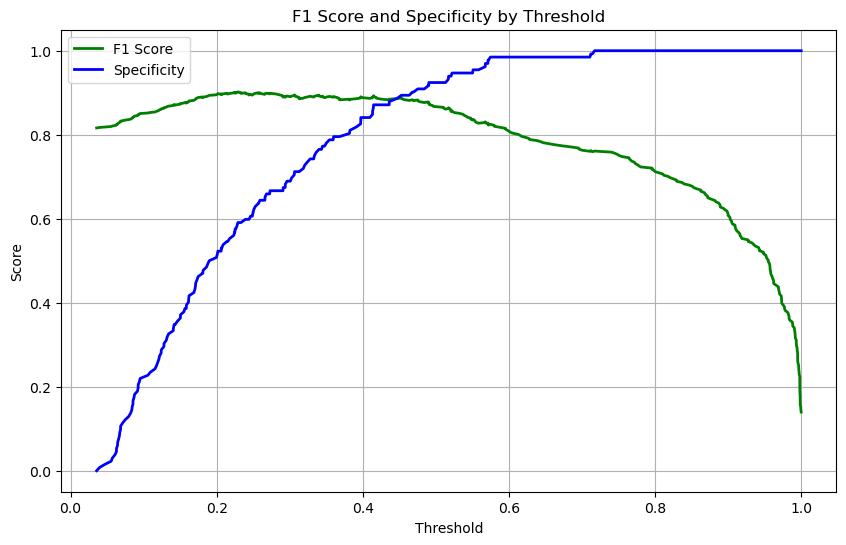

In [11]:
from sklearn.metrics import precision_recall_curve

# Predict probabilities for the reweighted model
probs_reweighted = Reweighted_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, probs_reweighted)

# Ensure that precision and recall arrays have the same length as thresholds
precision = precision[:-1]
recall = recall[:-1]

# Calculate F1-scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Calculate the specificity for each threshold
specificities = []
for thresh in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    binary_predictions = (probs_reweighted >= thresh).astype(int)
    # Calculate confusion matrix
    cm = confusion_matrix(Y_test, binary_predictions)
    TN = cm[0, 0]
    FP = cm[0, 1]
    # Calculate specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)




# Plot F1-scores and Specificity as threshold changes
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', linewidth=2, color='green')
plt.plot(thresholds, specificities, label='Specificity', linewidth=2, color='blue')
plt.title('F1 Score and Specificity by Threshold for RF Model')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


There is a marginal increase in the F1 score at thresholds below the conventional 0.5 mark, however, this benefit is offset by a notable decline in specificity. Therefore, the default threshold remains the preferred choice, balancing both metrics.

## 6. Confusion Matrix and Classification Report

Here, we assess the tuned model's performance using a confusion matrix for initial insights, followed by a classification report for detailed evaluation.

### 6.1 Confusion Matrix

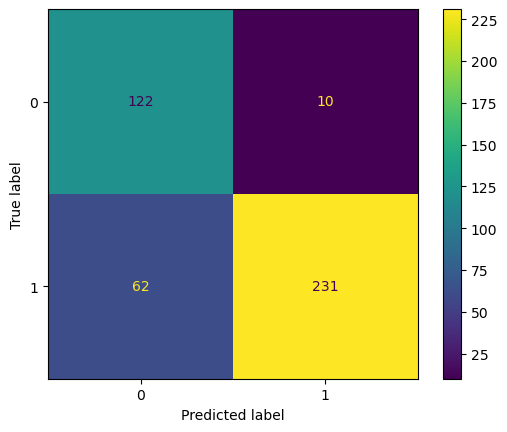

In [225]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(Reweighted_model, X_test, Y_test)

### 6.2 Classification Report, Specificity and AUC

In [282]:
from sklearn.metrics import classification_report

# Evaluate the reweighted model on the test data
Y_pred_reweighted=Reweighted_model.predict(X_test)
print("Classification Report for Test Data:")
print(classification_report(Y_test, Y_pred_reweighted))


# Evaluate the reweighted model on the training data to determine if there is over-fitting
Y_pred_reweighted_train=Reweighted_model.predict(X_train)
print("Classification Report for Training Data:")
print(classification_report(Y_train, Y_pred_reweighted_train))



# Predict probabilities for the reweighted model for the test and train sets
probs_reweighted = Reweighted_model.predict_proba(X_test)[:, 1]
probs_reweighted_train = Reweighted_model.predict_proba(X_train)[:, 1]

# Compute ROC curve and ROC area for the reweighted model for the test data
fpr_reweighted, tpr_reweighted, _ = roc_curve(Y_test, probs_reweighted)
roc_auc_reweighted = auc(fpr_reweighted, tpr_reweighted)
print("Reweighted Test ROC-AUC:", roc_auc_reweighted)

# Compute ROC curve and ROC area for the reweighted model for the train data
fpr_reweighted_train, tpr_reweighted_train, _ = roc_curve(Y_train, probs_reweighted_train)
roc_auc_reweighted_train = auc(fpr_reweighted_train, tpr_reweighted_train)
print("Reweighted Train ROC-AUC:", roc_auc_reweighted_train)




# Calculate the confusion matrix for the test data
cm_test = confusion_matrix(Y_test, Y_pred_reweighted)
TN_test = cm_test[0, 0]
FP_test = cm_test[0, 1]
specificity_test = TN_test / (TN_test + FP_test) if (TN_test + FP_test) > 0 else 0

# Calculate the confusion matrix for the training data
cm_train = confusion_matrix(Y_train, Y_pred_reweighted_train)
TN_train = cm_train[0, 0]
FP_train = cm_train[0, 1]
specificity_train = TN_train / (TN_train + FP_train) if (TN_train + FP_train) > 0 else 0

# Print the specificity results
print("Test Data - Specificity:", specificity_test)
print("Training Data - Specificity:", specificity_train)


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       132
           1       0.96      0.79      0.87       293

    accuracy                           0.83       425
   macro avg       0.81      0.86      0.82       425
weighted avg       0.87      0.83      0.84       425

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.69      0.91      0.79       528
           1       0.95      0.82      0.88      1171

    accuracy                           0.85      1699
   macro avg       0.82      0.86      0.83      1699
weighted avg       0.87      0.85      0.85      1699

Reweighted Test ROC-AUC: 0.9390836694590962
Reweighted Train ROC-AUC: 0.9489509743032374
Test Data - Specificity: 0.9242424242424242
Training Data - Specificity: 0.9071969696969697


**Analysis**

- Reduced Overfitting: The metrics between training and testing are closer in values compared to the baseline model.
- Class 0: The precision for class 0 fell by 0.06 while the recall increased by 0.17, leading to a higher f1-score of 0.77. This is in line with improving the f1-score as the primary performance metric.
- Class 1: Precision for class 1 increased by 0.07 while recall fell by 0.05, leading to lower f1-score by 0.01, reaching 0.87.
- Balance Between Classes: The model favours class 0 in terms of recall as a result of the f1-score primary metric, while precision is much high for the majority class. The f1-score remains imbalanced between both datasets.
- Accuracy is constant between the baseline and reweighted models.
- The reweighted AUC is modestly higher than that of the baseline RF model (about +1.5%), suggesting that the modifications made in the model tuning process have improved its discriminatory ability.

- The higher recall for class 0 (against the referendum) means that the model became better at identifying instances of this class (higher share of correctly labelled municipalities against), but the lower precision implies that this is at the cost of incorrectly labelling more instances from majority 1 (municipalities for the referendum) as belonging to the minority (having voted against).
- Conversely, the lower recall for class 1 implies that the model worsened at identifying municipalities which support the referendum, but the higher precision means that when it does classify municipalities as in favour (aka, is class 1), it is almost always correct.

## 7. SHAP Set Up and Feature Importance 

In this section, we investigate the model's feature importance both accross classes and for class 1 in isolation.

### 7.1 Set Up and Overall Shap Feature Importance

Shape of shap_values (Train): (1699, 17, 2)
Shape of shap_values (Test): (425, 17, 2)
Training set size: 1699
Test set size: 425


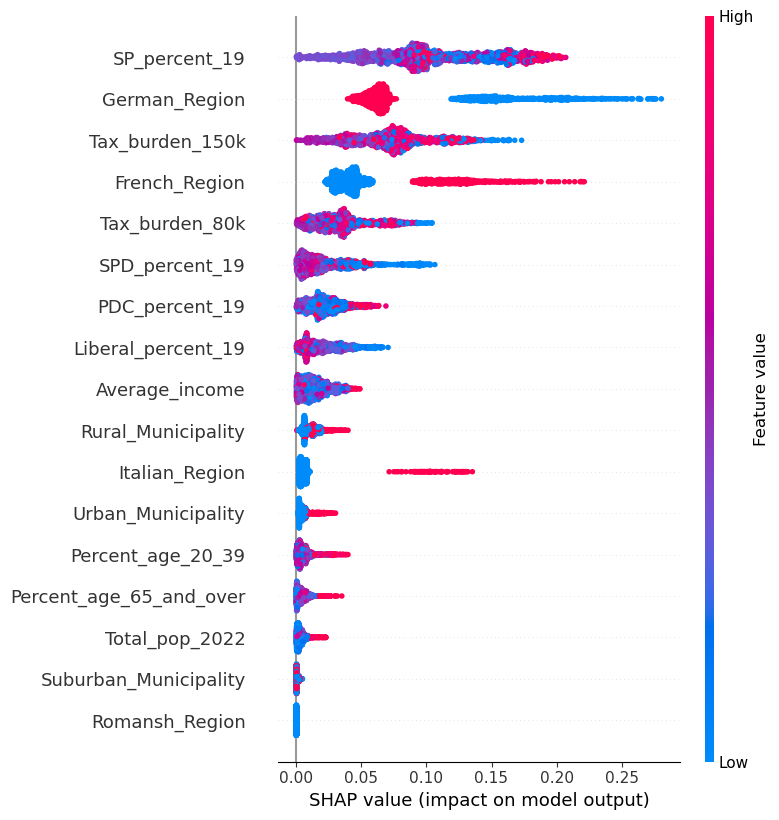

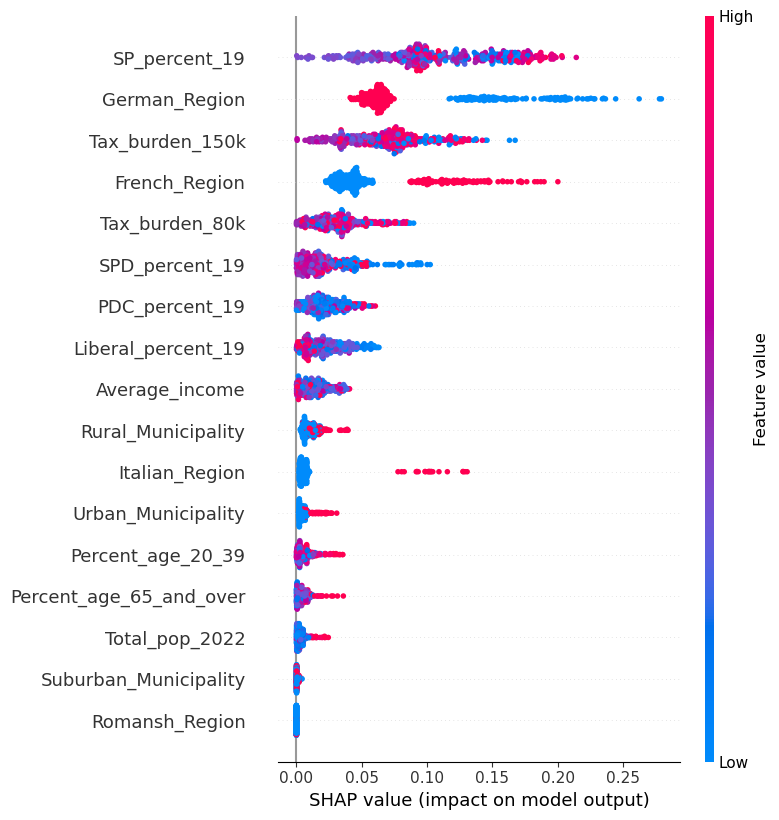

In [16]:
import shap
shap.initjs()

# Create a SHAP explainer object for the RandomForest model
explainer = shap.TreeExplainer(Reweighted_model)

# Calculate SHAP values for both the training and test sets
shap_values_train = explainer.shap_values(X_train)
shap_values_test = explainer.shap_values(X_test)

# Print the shape of SHAP values for both sets
print("Shape of shap_values (Train):", shap_values_train.shape) # shap_values_train has shape (n_samples, n_features, n_classes)
print("Shape of shap_values (Test):", shap_values_test.shape) # shap_values_test has shape (n_samples, n_features, n_classes)

# Compare with the sizes of the training and test sets
train_size = X_train.shape[0]
test_size = X_test.shape[0]
print("Training set size:", train_size)
print("Test set size:", test_size)

# Compute the mean absolute SHAP values across all classes for both sets
shap_values_mean_train = np.mean(np.abs(shap_values_train), axis=2)
shap_values_mean_test = np.mean(np.abs(shap_values_test), axis=2)

# Summarize the average effects of features using a SHAP summary plot for both training and test sets
shap.summary_plot(shap_values_mean_train, X_train, show=False)  # Average impact on model output for the training set
plt.figure()  # This ensures the plots do not overlap
shap.summary_plot(shap_values_mean_test, X_test, show=False)  # Average impact on model output for the test set
plt.show()


### 7.2 Gini Overall Feature Importance

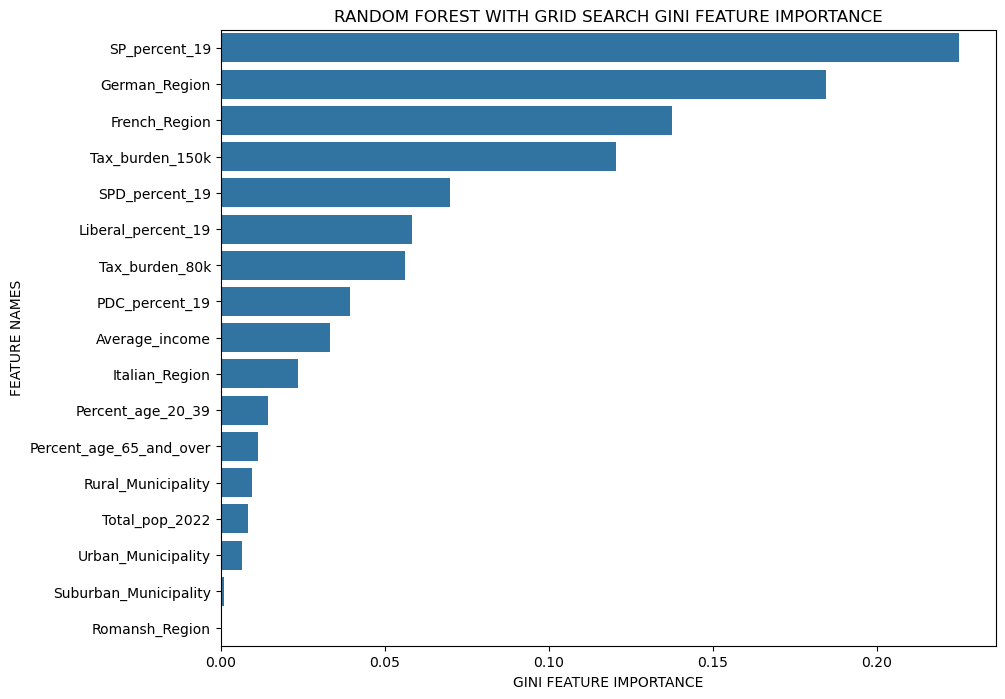

In [17]:
def plot_feature_importance(importance,names,model_type):
    
#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    #Add chart labels
    plt.title(model_type + 'GINI FEATURE IMPORTANCE')
    plt.xlabel('GINI FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

# Feature importance plot
plot_feature_importance(Reweighted_model.feature_importances_, X.columns, 'RANDOM FOREST WITH GRID SEARCH ')

### 7.3 Shap Feature importance for class "1"

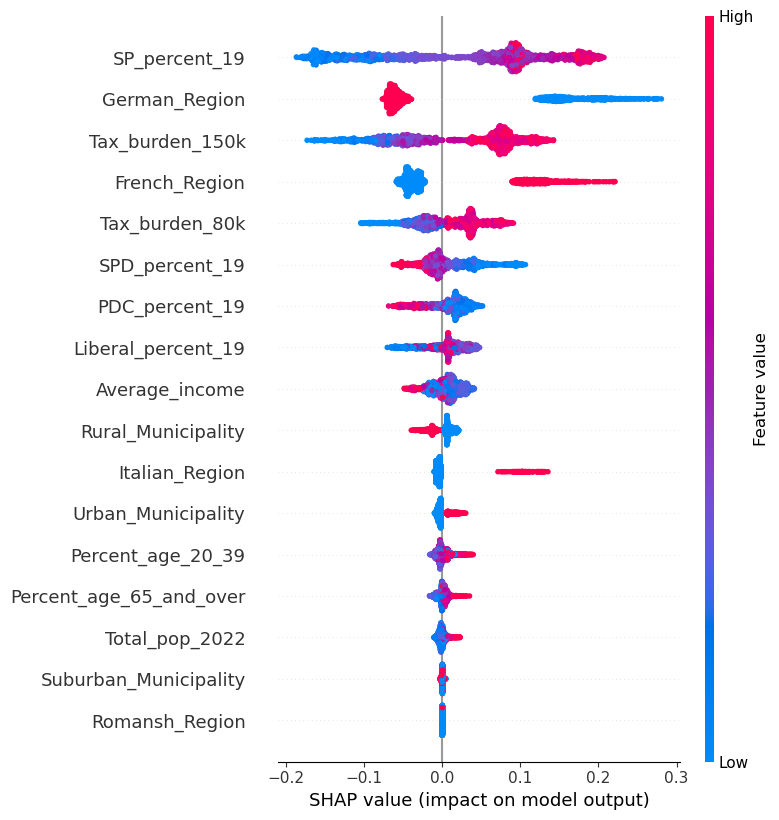

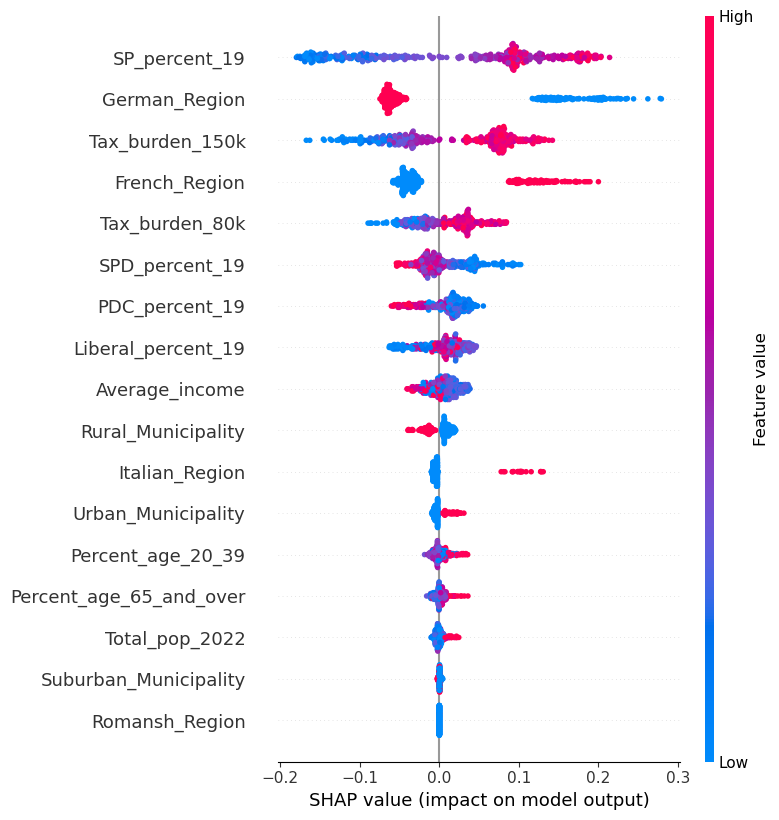

In [18]:
# Extract SHAP values for class 1 and reshape
shap_values_class1_train = shap_values_train[:, :, 1].reshape(-1, X_train.shape[1])
shap_values_class1_test = shap_values_test[:, :, 1].reshape(-1, X_test.shape[1])

# Plotting SHAP summary plot for training set
shap.summary_plot(shap_values_class1_train, X_train, plot_type="dot", show=False)
plt.show()  # Show the plot and prevent overlap 

# Plotting SHAP summary plot for test set
shap.summary_plot(shap_values_class1_test, X_test, plot_type="dot", show=True)


## 8. Force and Decision plots for any Municipality of Interest

Going a step further than in the previous section, we study feature importance at the municipality (observation) level. The examiner is invited to try the tool for a few Swiss municipalities of their choice.

How to use: Simply type the name of the municipality you want to investigate in "Municipality_name = ". The code will then automatically display a force and decision plot for said municipality. 

Note 1: Municipality names should be are spelt in the language of their region, i.e., Geneva is Genève and Zurich is Zürich.

Note 2: Data is reloaded and cleaned before generating the force and decision plots to ensure that the target is a data frame, not an array. Using an array results in displaying the wrong municipality as .loc is not available.

Vaux-sur-Morges has been removed from the dataset.
Predicted probability for Genève in the Training set is 1.0
Model prediction for Genève in the Training set is [1]
Actual referendum result for Genève in the Training set was [1]


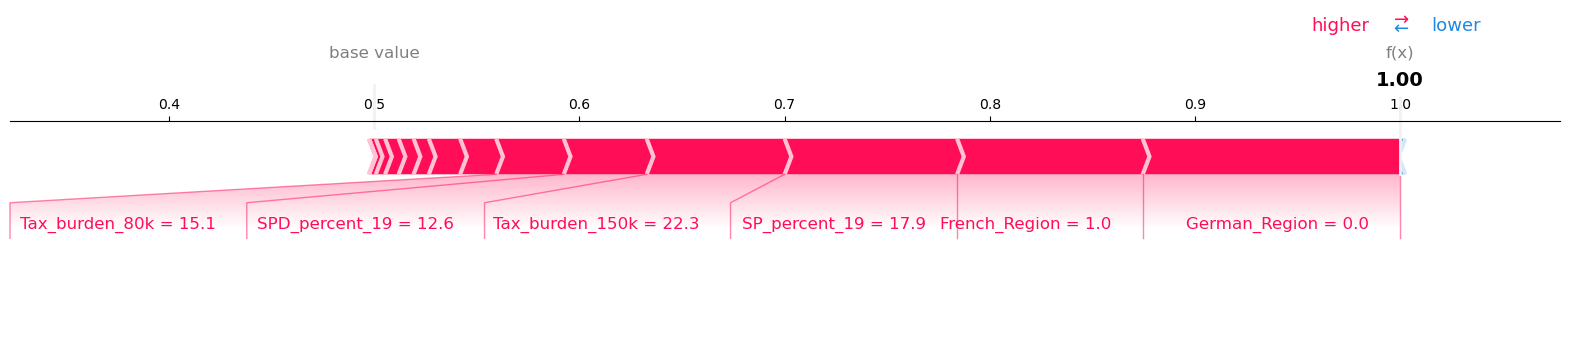

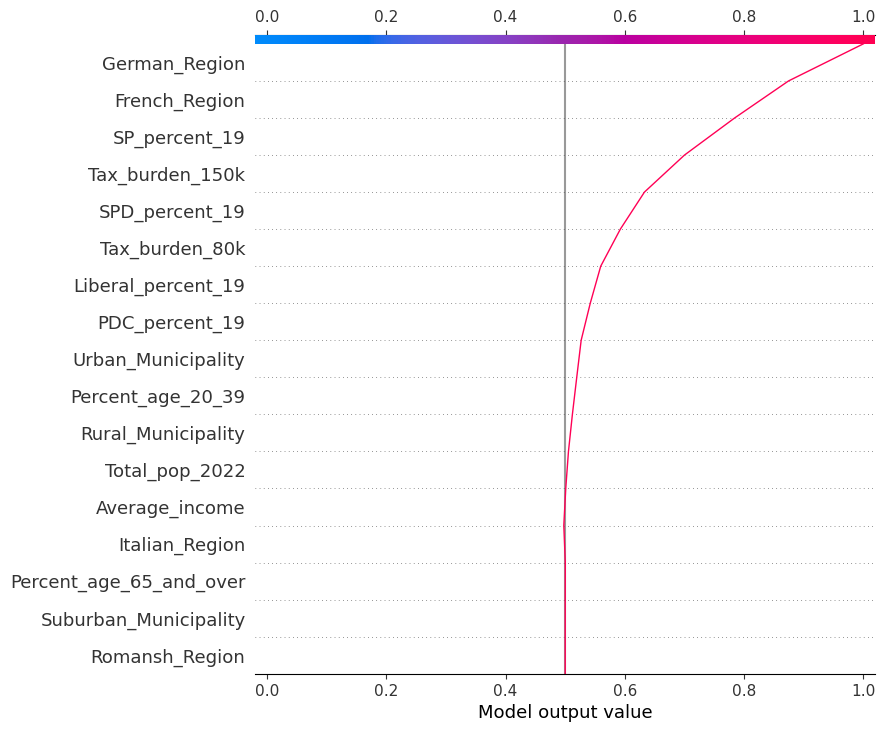

In [284]:
# Load the data
Data_clean = pd.read_csv("ML_final_data_clean.csv")

# Identify and remove Vaux-sur-Morges before any further processing (ensures consistency with logit data and that variables represent "their" population)
vaux_index = Data_clean[Data_clean['Municipality_name'] == 'Vaux-sur-Morges'].index
if not vaux_index.empty:
    Data_clean.drop(index=vaux_index, inplace=True)
    print("Vaux-sur-Morges has been removed from the dataset.")
else:
    print("Vaux-sur-Morges not found in the dataset.")

# Reset the index after modifications to ensure alignment
Data_clean.reset_index(drop=True, inplace=True)

# Create a mapping table for sample indices
mapping_table = Data_clean[['Municipality_name']].reset_index()

# Define X and y columns
X_columns = ['Average_income', 'Tax_burden_80k', 'Tax_burden_150k', 
          'Percent_age_65_and_over', 'Percent_age_20_39','Total_pop_2022',
          'SP_percent_19', 'SPD_percent_19', 'Liberal_percent_19',
          'PDC_percent_19', 'French_Region', 'Italian_Region', 'Romansh_Region',
                  'German_Region', 'Urban_Municipality', 'Suburban_Municipality', 'Rural_Municipality']
Y_column = ['Referendum_pass']

X = Data_clean[X_columns]
Y = Data_clean[Y_column]

# Data split
X_train, X_test, Y_train, Y_test, train_mapping_table, test_mapping_table = train_test_split(
    X, Y, mapping_table, train_size=0.80, random_state=42, stratify=Y) 



# Define the municipality of interest
Municipality_name = "Genève"

# Check in the training mapping table first, then in the test mapping table
if Municipality_name in train_mapping_table['Municipality_name'].values:
    index_value = train_mapping_table[train_mapping_table['Municipality_name'] == Municipality_name].index[0]
    integer_index = train_mapping_table.index.tolist().index(index_value)
    dataset = X_train
    outcomes = Y_train
    set_type = 'Training'
elif Municipality_name in test_mapping_table['Municipality_name'].values:
    index_value = test_mapping_table[test_mapping_table['Municipality_name'] == Municipality_name].index[0]
    integer_index = test_mapping_table.index.tolist().index(index_value)
    dataset = X_test
    outcomes = Y_test
    set_type = 'Test'
else:
    print(f"{Municipality_name} not found in the training or test set.")
    set_type = None

# Data Preparation:
if set_type:
    instance_data = dataset.loc[index_value] # Retrieve the feature data from the relevant dataset
    actual_result = outcomes.loc[index_value] # Retrieve the outcome data from the outcomes set
    shap_values_subset = explainer.shap_values(dataset) #  Compute the SHAP values for the entire dataset

    # Predict probability
    predicted_probability = Reweighted_model.predict_proba(instance_data.values.reshape(1, -1))[0, 1]

    # Predict and plot
    print(f"Predicted probability for {Municipality_name} in the {set_type} set is {predicted_probability}")
    model_prediction = Reweighted_model.predict(instance_data.values.reshape(1, -1))
    print(f"Model prediction for {Municipality_name} in the {set_type} set is {model_prediction}")
    print(f"Actual referendum result for {Municipality_name} in the {set_type} set was {actual_result.values}")

    # Round the feature values to two decimal places
    instance_data_rounded = instance_data.round(1)
    
    # Force plot for class 1 (the positive class)
    shap.force_plot(explainer.expected_value[1], shap_values_subset[integer_index, :, 1], features=instance_data_rounded, feature_names=dataset.columns.tolist(), matplotlib=True)
    
    # Decision plot for class 1 
    shap.decision_plot(explainer.expected_value[1], shap_values_subset[integer_index, :, 1], feature_names=dataset.columns.tolist())




## 9. Shap safety checks (not in report)

This section consists in a series of checks to ensure that the correct values are accessed when investigating specific municipalities.

### 9.1 Ensure that the indices and predictions of the RF model and Shap values align

Looking at the 20 first predictions of the training set

In [ ]:
# Calculate the SHAP values for the positive class
shap_values_train = explainer.shap_values(X_train[:20])
shap_values_positive_class_train = shap_values_train[1] if isinstance(shap_values_train, list) else shap_values_train

# Sum SHAP values across all features for each instance
summed_shap_values_train = np.sum(shap_values_positive_class_train, axis=1)

# Get the base value for the positive class
base_value_positive_class_train = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value

# Predicted probabilities for the first 20 instances for the positive class
predicted_probabilities_positive_class_train = Reweighted_model.predict_proba(X_train[:20])[:, 1]

print("Base Value (Positive Class - Train):", base_value_positive_class_train)
print("Summed SHAP values plus Base Value for the first 20 instances (Train):")
print(summed_shap_values_train + base_value_positive_class_train)
print("Predicted probabilities (Positive Class) for the first 20 instances (Train):")
print(predicted_probabilities_positive_class_train)


Similarly, for the test set

In [ ]:
import numpy as np

# Calculate the SHAP values for the positive class
shap_values = explainer.shap_values(X_test[:20])
shap_values_positive_class = shap_values[1] if isinstance(shap_values, list) else shap_values

# Sum SHAP values across all features for each instance
summed_shap_values = np.sum(shap_values_positive_class, axis=1)

# Get the base value for the positive class
base_value_positive_class = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value

# Predicted probabilities for the first 20 instances for the positive class
predicted_probabilities_positive_class = Reweighted_model.predict_proba(X_test[:20])[:, 1]

print("Base Value (Positive Class):", base_value_positive_class)
print("Summed SHAP values plus Base Value for the first 20 instances:")
print(summed_shap_values + base_value_positive_class)
print("Predicted probabilities (Positive Class) for the first 20 instances:")
print(predicted_probabilities_positive_class)



### 9.2 Verify that indices are aligned between mapping tables and test/train sets

Ensure no shuffling or index resetting occurs at any point after the split (if nothing shows up, the test is passed)

In [ ]:
# This step seems to be passed already, but let's confirm it explicitly.
if X_train.index.equals(train_mapping_table.index):
    print("Train indices are aligned.")
else:
    print("Train indices are not aligned.")

if X_test.index.equals(test_mapping_table.index):
    print("Test indices are aligned.")
else:
    print("Test indices are not aligned.")


### 9.3 In-depth Investigatation of a Single City - Bern

In [286]:

# 1) Check the features and index for Bern in the original dataset

# Load the original dataset
Data_clean = pd.read_csv("ML_final_data_clean.csv")

# Check the entries specifically for Bern
bern_data = Data_clean[Data_clean['Municipality_name'] == 'Bern']
print(bern_data) 
# Bern is instance 191 - we will use the other instances to ensure we succesfully track bern throughout the splits and models



# 2) Check for 'Bern''s presence in both test and training mapping tables, ensuring instances still match original data
print("Checking for 'Bern' in the test mapping table...")
if "Bern" in test_mapping_table['Municipality_name'].values:
    print("'Bern' is in the test mapping table.")
else:
    print("'Bern' not found in the test mapping table.")

print("Checking for 'Bern' in the training mapping table...")
if "Bern" in train_mapping_table['Municipality_name'].values:
    print("'Bern' is in the training mapping table.")
else:
    print("'Bern' not found in the training mapping table.")

# Bern is in the training set



# Check Bern's data in the training set
if 'Bern' in train_mapping_table['Municipality_name'].values:
    bern_index = train_mapping_table[train_mapping_table['Municipality_name'] == 'Bern'].index[0]
    print("Bern's data in the training set:")
    print(X_train.loc[bern_index]) # Print predictors' data
    print(Y_train.loc[bern_index]) # Print outcome/target data
else:
    print("Bern is not in the training set.")

# We see that all predictors, the target, and instance number (191) still perfectly align with the original data set. This suggests 
# the simultaneous split was successful. Looking at the values, this conclusion is confirmed as they align with the official figures 
# published by the Federal Statistics Office.



## !!IMPORTANT!!!

print("THE FOLLOWING DATA IS INCORRECT AND SERVES AS EXAMPLE OF WRONG INDEXING")
# Given Bern is in the training set
if 'Bern' in train_mapping_table['Municipality_name'].values:
    instance_index = train_mapping_table[train_mapping_table['Municipality_name'] == 'Bern'].index[0]
    print("Index of Bern in train_mapping_table:", instance_index)

    # Compare with feature values to demonstrate the inaccuracy
    print("Incorrect feature values for Bern:", X_train.iloc[instance_index])

print("Here, we see that the data displayed is not that for Bern.")
print("This is because .iloc retrieves data based on the position (integer index) in the data frame, not on the actual index values that correspond to the rows in train_mapping_table.") 
print("In contrast,.loc, fetches data based on the dataframe's index values.")
# USING ILOC OVER LOC YIELDS THE WRONG OUTPUT




# 3) Ensure that the probability estimates for Bern and the actual prediction align


# Given Bern is in the training set and indexed at 191 - obtain probability estimates
probabilities = Reweighted_model.predict_proba(X_train.loc[[191]])[:, 1]
print(f"Probability estimates for Bern: {probabilities}")

# The probability that Bern is of class 1 (votes in favour of the referendum) is 95.059%

# Get the actual prediction
predictions = Reweighted_model.predict(X_train.loc[[191]])
print(f"Prediction for Bern: {predictions}")

# Bern is indeed predicted to be of class 1.




     bfs_nr_new Municipality_name  Referendum_pass  Liberal_percent_19  \
191         351              Bern                1            7.617458   

     PDC_percent_19  SP_percent_19  SPD_percent_19  Average_income  \
191        2.030518      28.710722        9.477091           78.61   

     Total_pop_2022  Percent_age_65_and_over  Percent_age_20_39  \
191          134506                17.234175          33.600732   

     Tax_burden_80k  Tax_burden_150k  French_Region  German_Region  \
191            15.5             21.5              0              1   

     Italian_Region  Romansh_Region  Urban_Municipality  \
191               0               0                   1   

     Suburban_Municipality  Rural_Municipality  
191                      0                   0  
Checking for 'Bern' in the test mapping table...
'Bern' not found in the test mapping table.
Checking for 'Bern' in the training mapping table...
'Bern' is in the training mapping table.
Bern's data in the training se